Start by loading dependencies.

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec

Set settings from backtest file.

In [2]:
alpha = 0
oneQuarter = 63
trainingSizes = [oneQuarter, 2*oneQuarter, 3*oneQuarter, 4*oneQuarter, 8*oneQuarter]
nModels = 2
nStatistics = 21
nRebalances = 87
nTrainings = len(trainingSizes)
nTrajectories = 4

Specify settings for plots.

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})
myMap = plt.get_cmap('inferno') # Paired, inferno

Specify relative path.

In [4]:
relativePath = "./Results/Backtest/RAERM/"

Specify id's.

In [5]:
idRecording = 2

Load file to access dates.

In [6]:
rebalanceDates = pd.read_csv(relativePath + "RebalanceDates.csv")
trajectoryDates = pd.read_csv(relativePath + "TrajectoryDates.csv")

Then load files.

In [7]:
# Load optimal Wasserstein radii
fileNameEps = "id{}_Backtest_RAERM_epsOpt_Experiment1.csv".format(idRecording)
filePathEps = relativePath + fileNameEps
epsOpt = np.loadtxt(filePathEps).reshape((nTrainings, nRebalances))

# Load trajectories of portfolios
fileNameTrajectories = "id{}_Backtest_RAERM_Trajectories_Experiment1.csv".format(idRecording)
filePathTrajectories = relativePath + fileNameTrajectories
trajectories = np.loadtxt(filePathTrajectories).reshape((nTrainings, len(trajectoryDates), nTrajectories))

# Load in-sample statistics
fileNameInSample = "id{}_Backtest_RAERM_IS_statistics_Experiment1.csv".format(idRecording)
filePathInSample = relativePath + fileNameInSample
IS_statistics = np.loadtxt(filePathInSample).reshape((nModels, nTrainings, nRebalances, nStatistics))

# Load out-of-sample statistics
fileNameOutOfSample = "id{}_Backtest_RAERM_OoS_statistics_Experiment1.csv".format(idRecording)
filePathOutOfSample = relativePath + fileNameOutOfSample
OoS_statistics = np.loadtxt(filePathOutOfSample).reshape((nModels, nTrainings, nRebalances, nStatistics))

# Load Wasserstein experiment
fileNameOutOfSample = "id{}_Backtest_RAERM_Wasserstein_Experiment1.csv".format(idRecording)
filePathOutOfSample = relativePath + fileNameOutOfSample
Wasserstein = np.loadtxt(filePathOutOfSample).reshape((nTrainings, nRebalances))

### Plots of Trajectories for Overview

In [8]:
cumulativeReturns = (np.cumprod(trajectories, axis=1) - 1) * 100
trajectoryDates = np.array(trajectoryDates['Dates'], dtype=np.datetime64)
rebalanceDates = np.array(rebalanceDates['Dates'], dtype=np.datetime64)
compatableDates = trajectoryDates.copy()

Construct a new array to hold the excess return trajectories.

In [9]:
trajectories.shape

(5, 5369, 4)

In [10]:
excessReturnsSAA = trajectories[:,:,2] - trajectories[:,:,0]
excessReturnsDRO = trajectories[:,:,3] - trajectories[:,:,0]
excessCompoundedReturnsSAA = (np.cumprod(excessReturnsSAA + 1, axis=1) - 1)*100
excessCompoundedReturnsDRO = (np.cumprod(excessReturnsDRO + 1, axis=1) - 1)*100

Then we construct the returns relative to SAA.

In [11]:
excessResultsSAA = cumulativeReturns[:,:,2] - cumulativeReturns[:,:,1]
excessResultsDRO = cumulativeReturns[:,:,3] - cumulativeReturns[:,:,1]

Then we construct the actual plots.

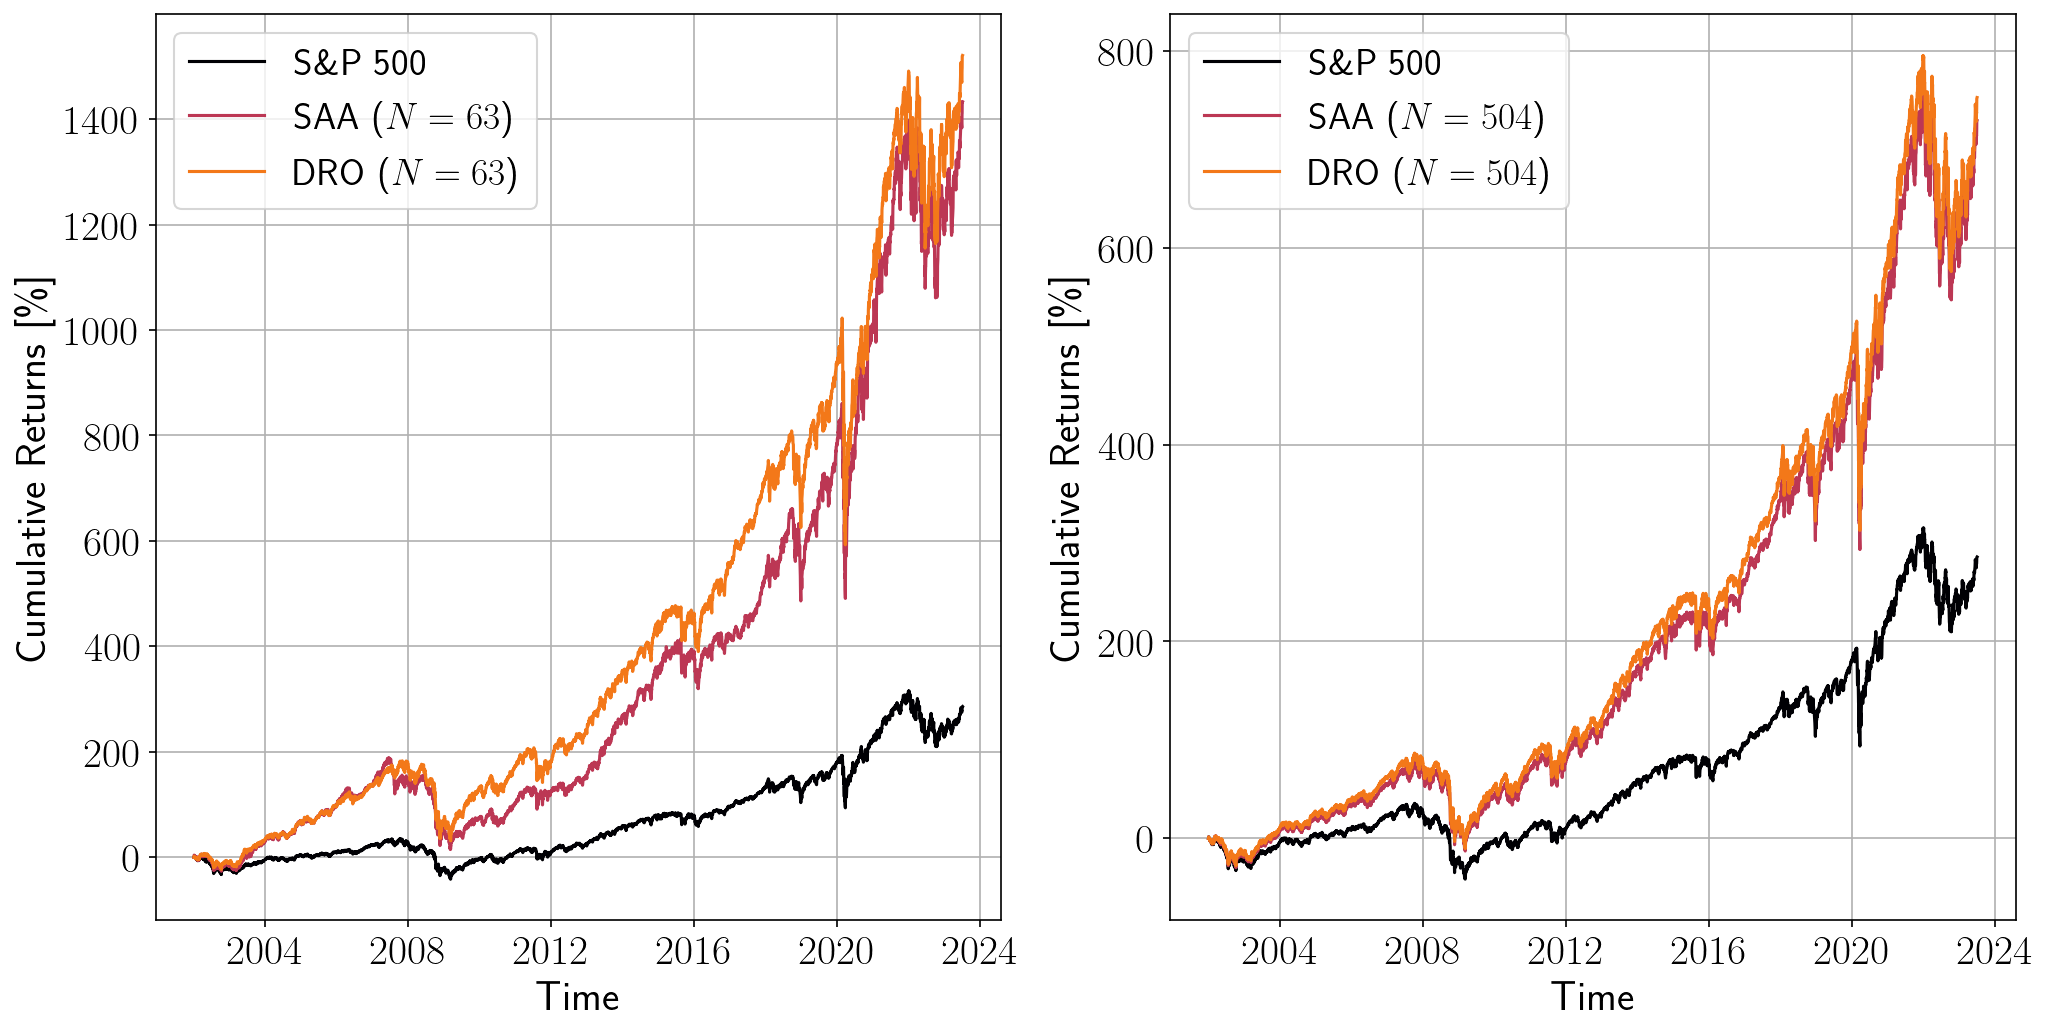

In [12]:
# Prepare plot settings
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Control settings
xlabel=r'Time'
ylabel=r'Cumulative Returns [\%]'
legend_loc="upper left"

# Prepare plots using gridspec
fig = plt.figure(figsize=(16, 8), dpi=150)
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1, 1])

# Specify which sample size to plot for
TX = 0
selectedSize = trainingSizes[TX]

# Plot
ax1 = plt.subplot(gs[0, 0])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500', color=myMap(0.0))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'DRO ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Set number size
plt.xticks(fontsize=def_font_size+2)  # Decrease font size for x-axis
plt.yticks(fontsize=def_font_size+2)  # Decrease font size for y-axis

# Plot
TX = 4
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 1])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500', color=myMap(0.0))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'DRO ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Set number size
plt.xticks(fontsize=def_font_size+2)  # Decrease font size for x-axis
plt.yticks(fontsize=def_font_size+2)  # Decrease font size for y-axis

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = f'Backtest_RAERMDRO_Fig1_CUMULATIVE_TWO.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

Then we plot all of them for the appendix.

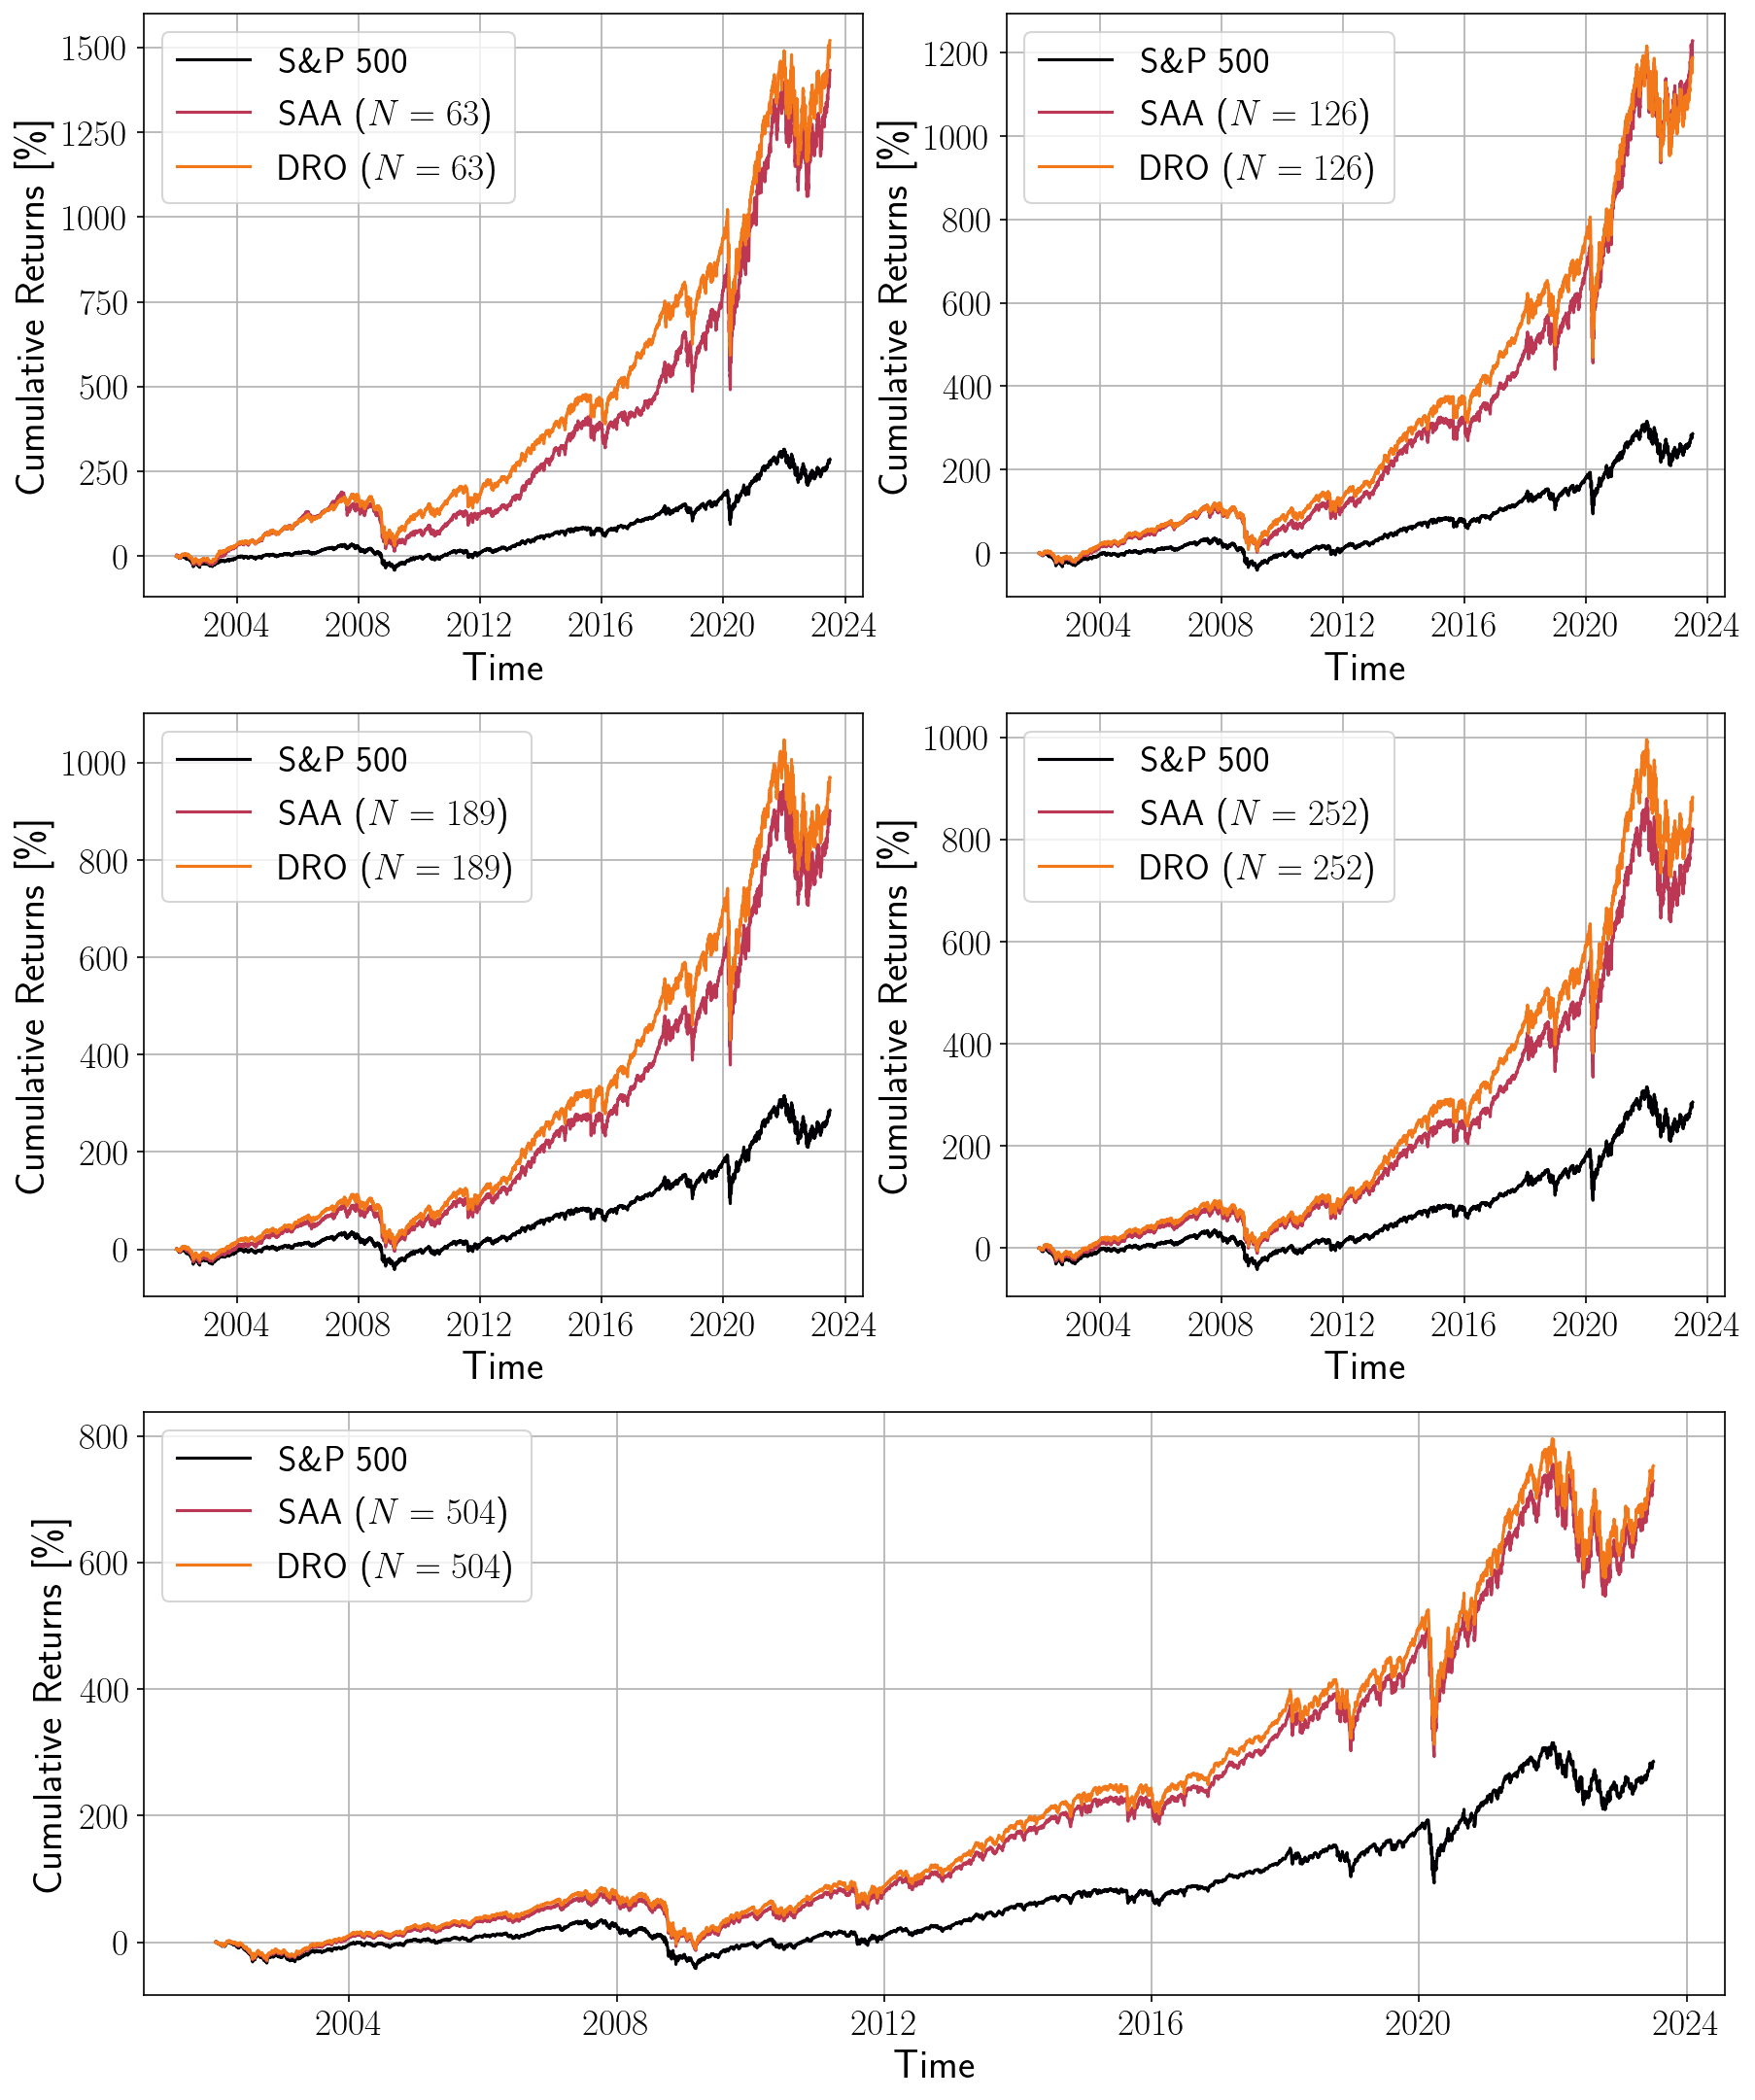

In [13]:
# Prepare plot settings
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Control settings
xlabel=r'Time'
ylabel=r'Cumulative Returns [\%]'
legend_loc="upper left"

# Prepare plots using gridspec
fig = plt.figure(figsize=(14, 18), dpi=150)
gs = gridspec.GridSpec(3, 2, height_ratios=[1,1,1], width_ratios=[1, 1])

# Plot
TX = 0
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 0])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500', color=myMap(0.0))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'DRO ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 1
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 1])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500', color=myMap(0.0))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'DRO ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 2
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[1, 0])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500', color=myMap(0.0))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'DRO ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 3
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[1, 1])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500', color=myMap(0.0))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'DRO ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 4
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[2, :])
ax1.plot(compatableDates, cumulativeReturns[TX,:,0] , label=r'S\&P 500', color=myMap(0.0))
ax1.plot(compatableDates, cumulativeReturns[TX,:,2] , label=f'SAA ($N = {selectedSize}$)', color=myMap(0.5))
ax1.plot(compatableDates, cumulativeReturns[TX,:,3] , label=f'DRO ($N = {selectedSize}$)', color=myMap(0.7))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = f'Backtest_RAERMDRO_Fig2_CUMULATIVE_ALL.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

Then we can check them relative to the benchmark.

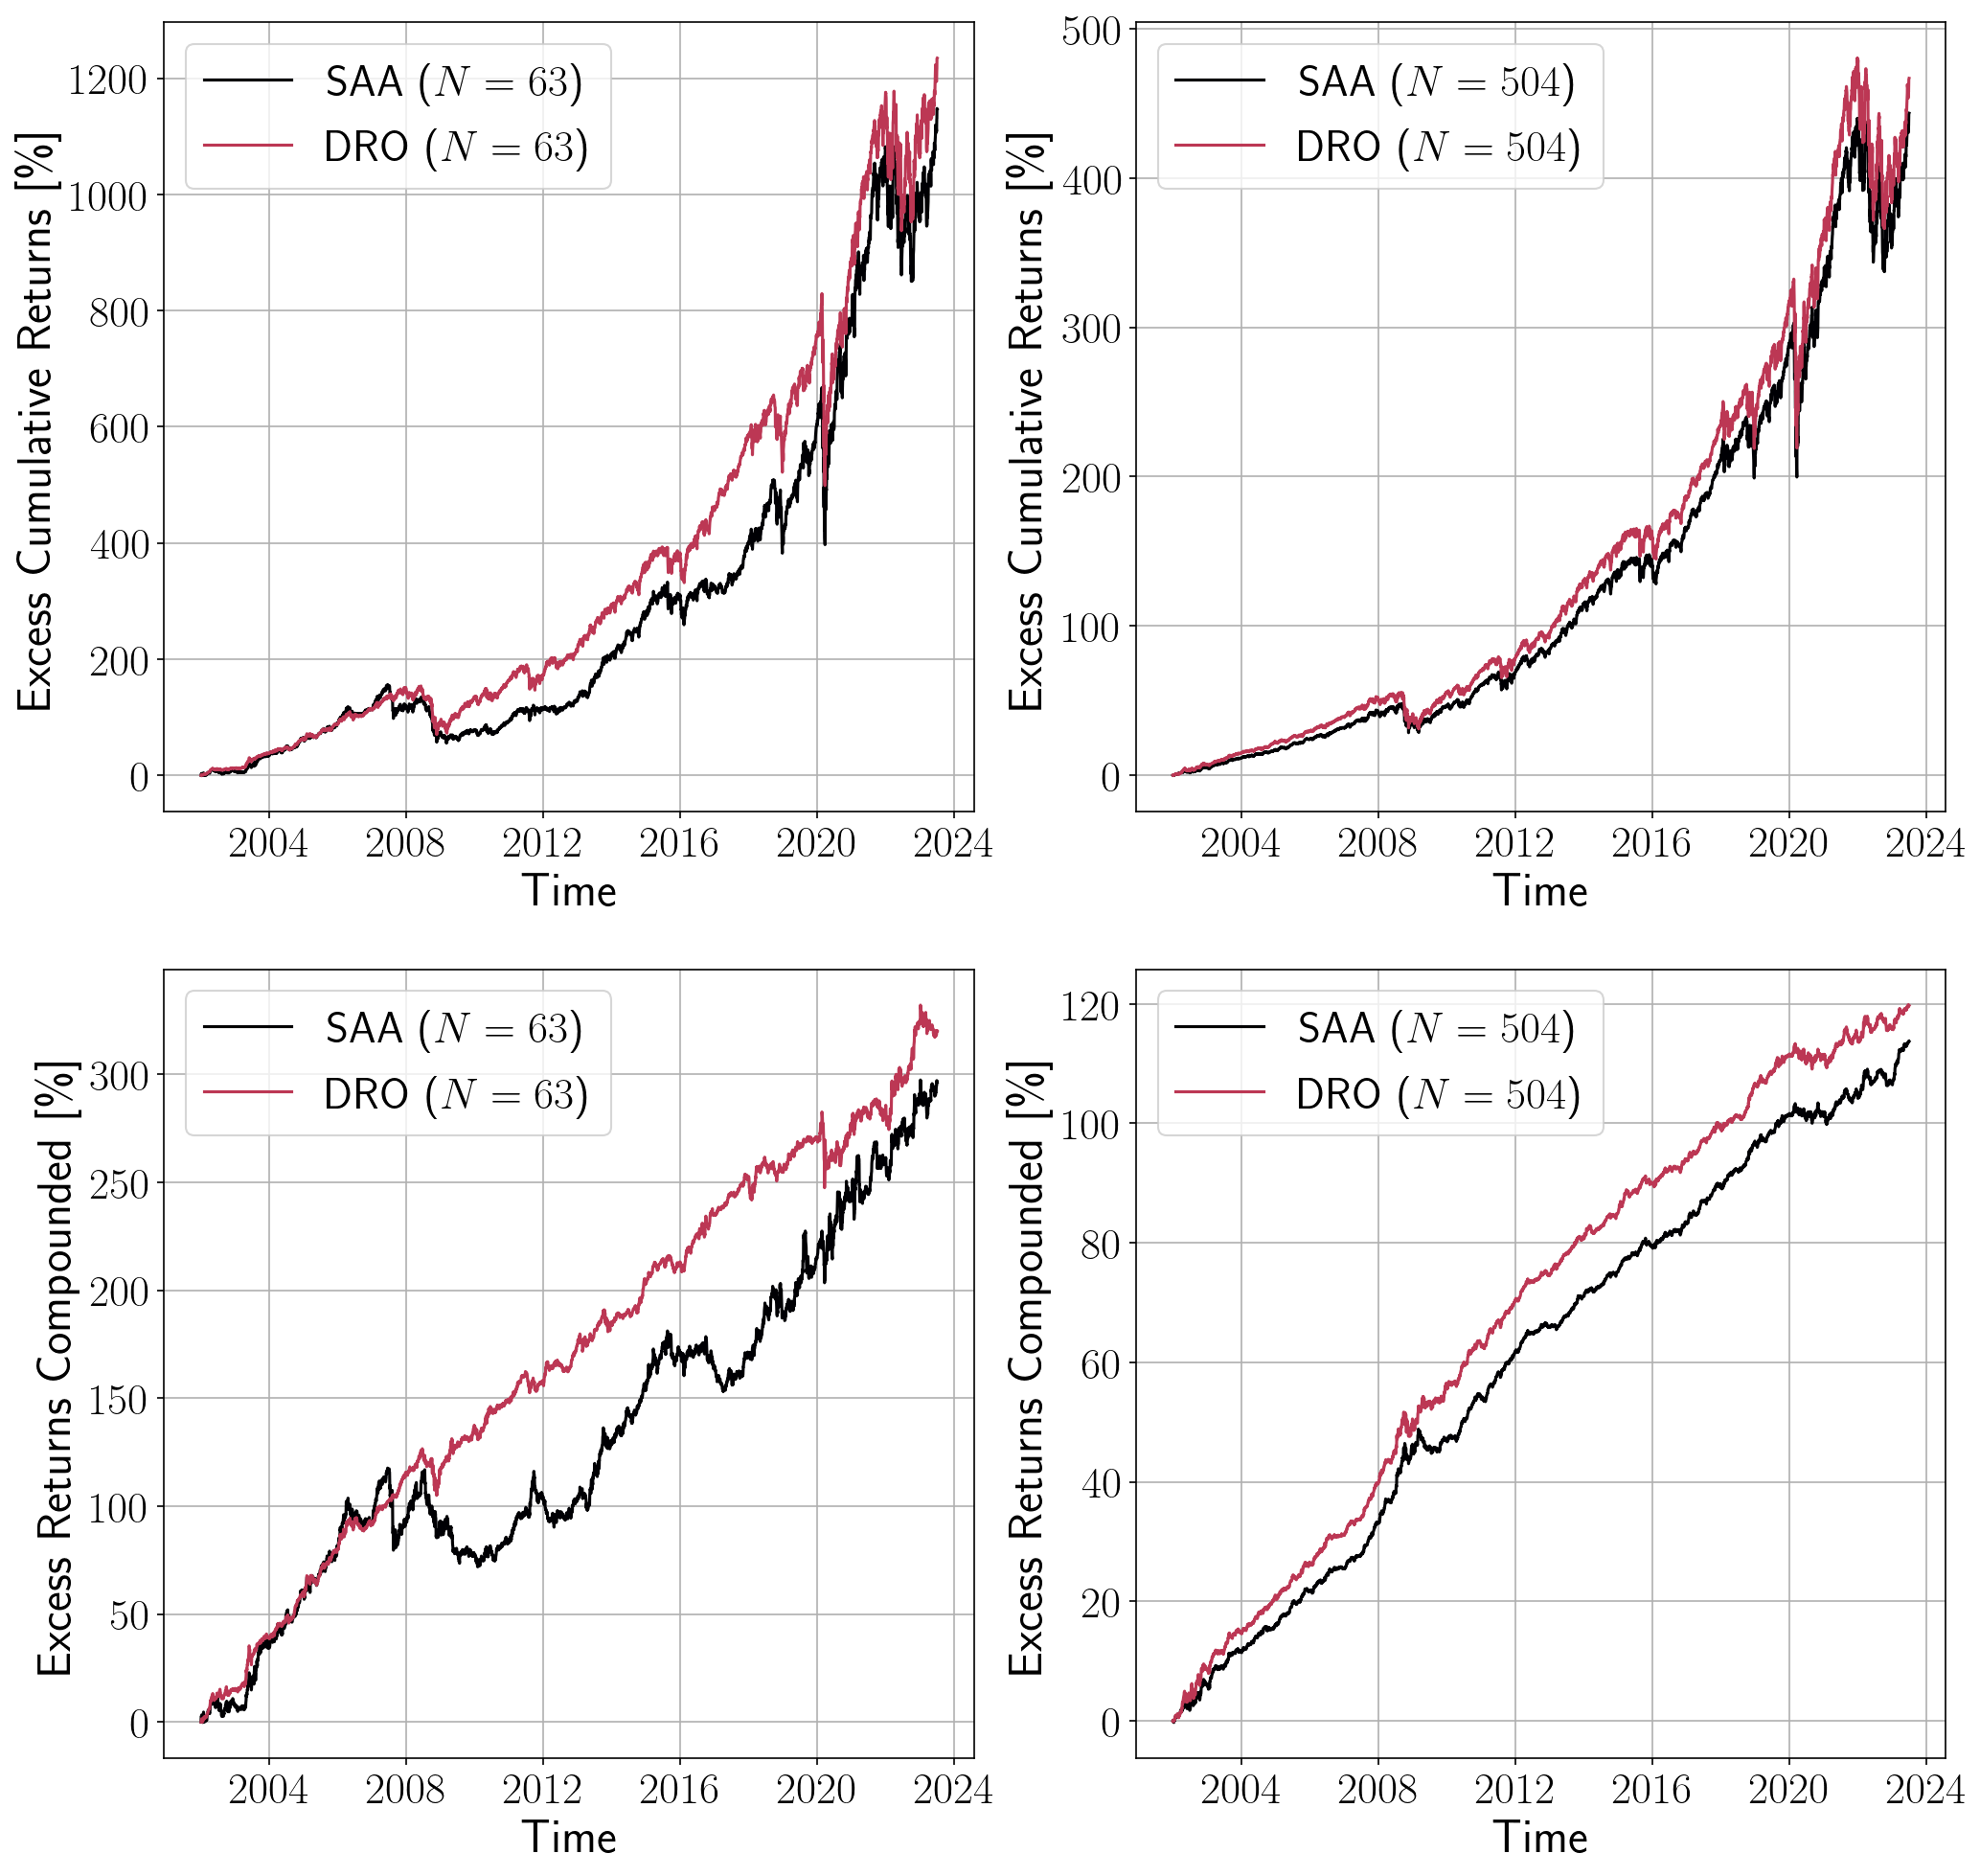

In [14]:
# Prepare plot settings
def_font_size = 22
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Control settings
xlabel=r'Time'
ylabel=r'Excess Cumulative Returns [\%]'
legend_loc="upper left"

# Prepare plots using gridspec
fig = plt.figure(figsize=(16, 16), dpi=150)
gs = gridspec.GridSpec(2, 2, height_ratios=[1,1], width_ratios=[1, 1])

# Specify which sample size to plot for
TX = 0
selectedSize = trainingSizes[TX]

# Plot
ax1 = plt.subplot(gs[0, 0])
ax1.plot(compatableDates, excessResultsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessResultsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 4
selectedSize = trainingSizes[TX]

# Plot
ax1 = plt.subplot(gs[0, 1])
ax1.plot(compatableDates, excessResultsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessResultsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Control settings
xlabel=r'Time'
ylabel=r'Excess Returns Compounded [\%]'
legend_loc="upper left"

# Specify which sample size to plot for
TX = 0
selectedSize = trainingSizes[TX]

# Plot
ax1 = plt.subplot(gs[1, 0])
ax1.plot(compatableDates, excessCompoundedReturnsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessCompoundedReturnsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 4
selectedSize = trainingSizes[TX]

# Plot
ax1 = plt.subplot(gs[1, 1])
ax1.plot(compatableDates, excessCompoundedReturnsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessCompoundedReturnsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = f'Backtest_RAERMDRO_Fig3_CUMULATIVE_RELATIVE_TWO.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

Then we have to make two kind of plots. One where all the upper "two" are represented, and one where all the lower "two" are represented.

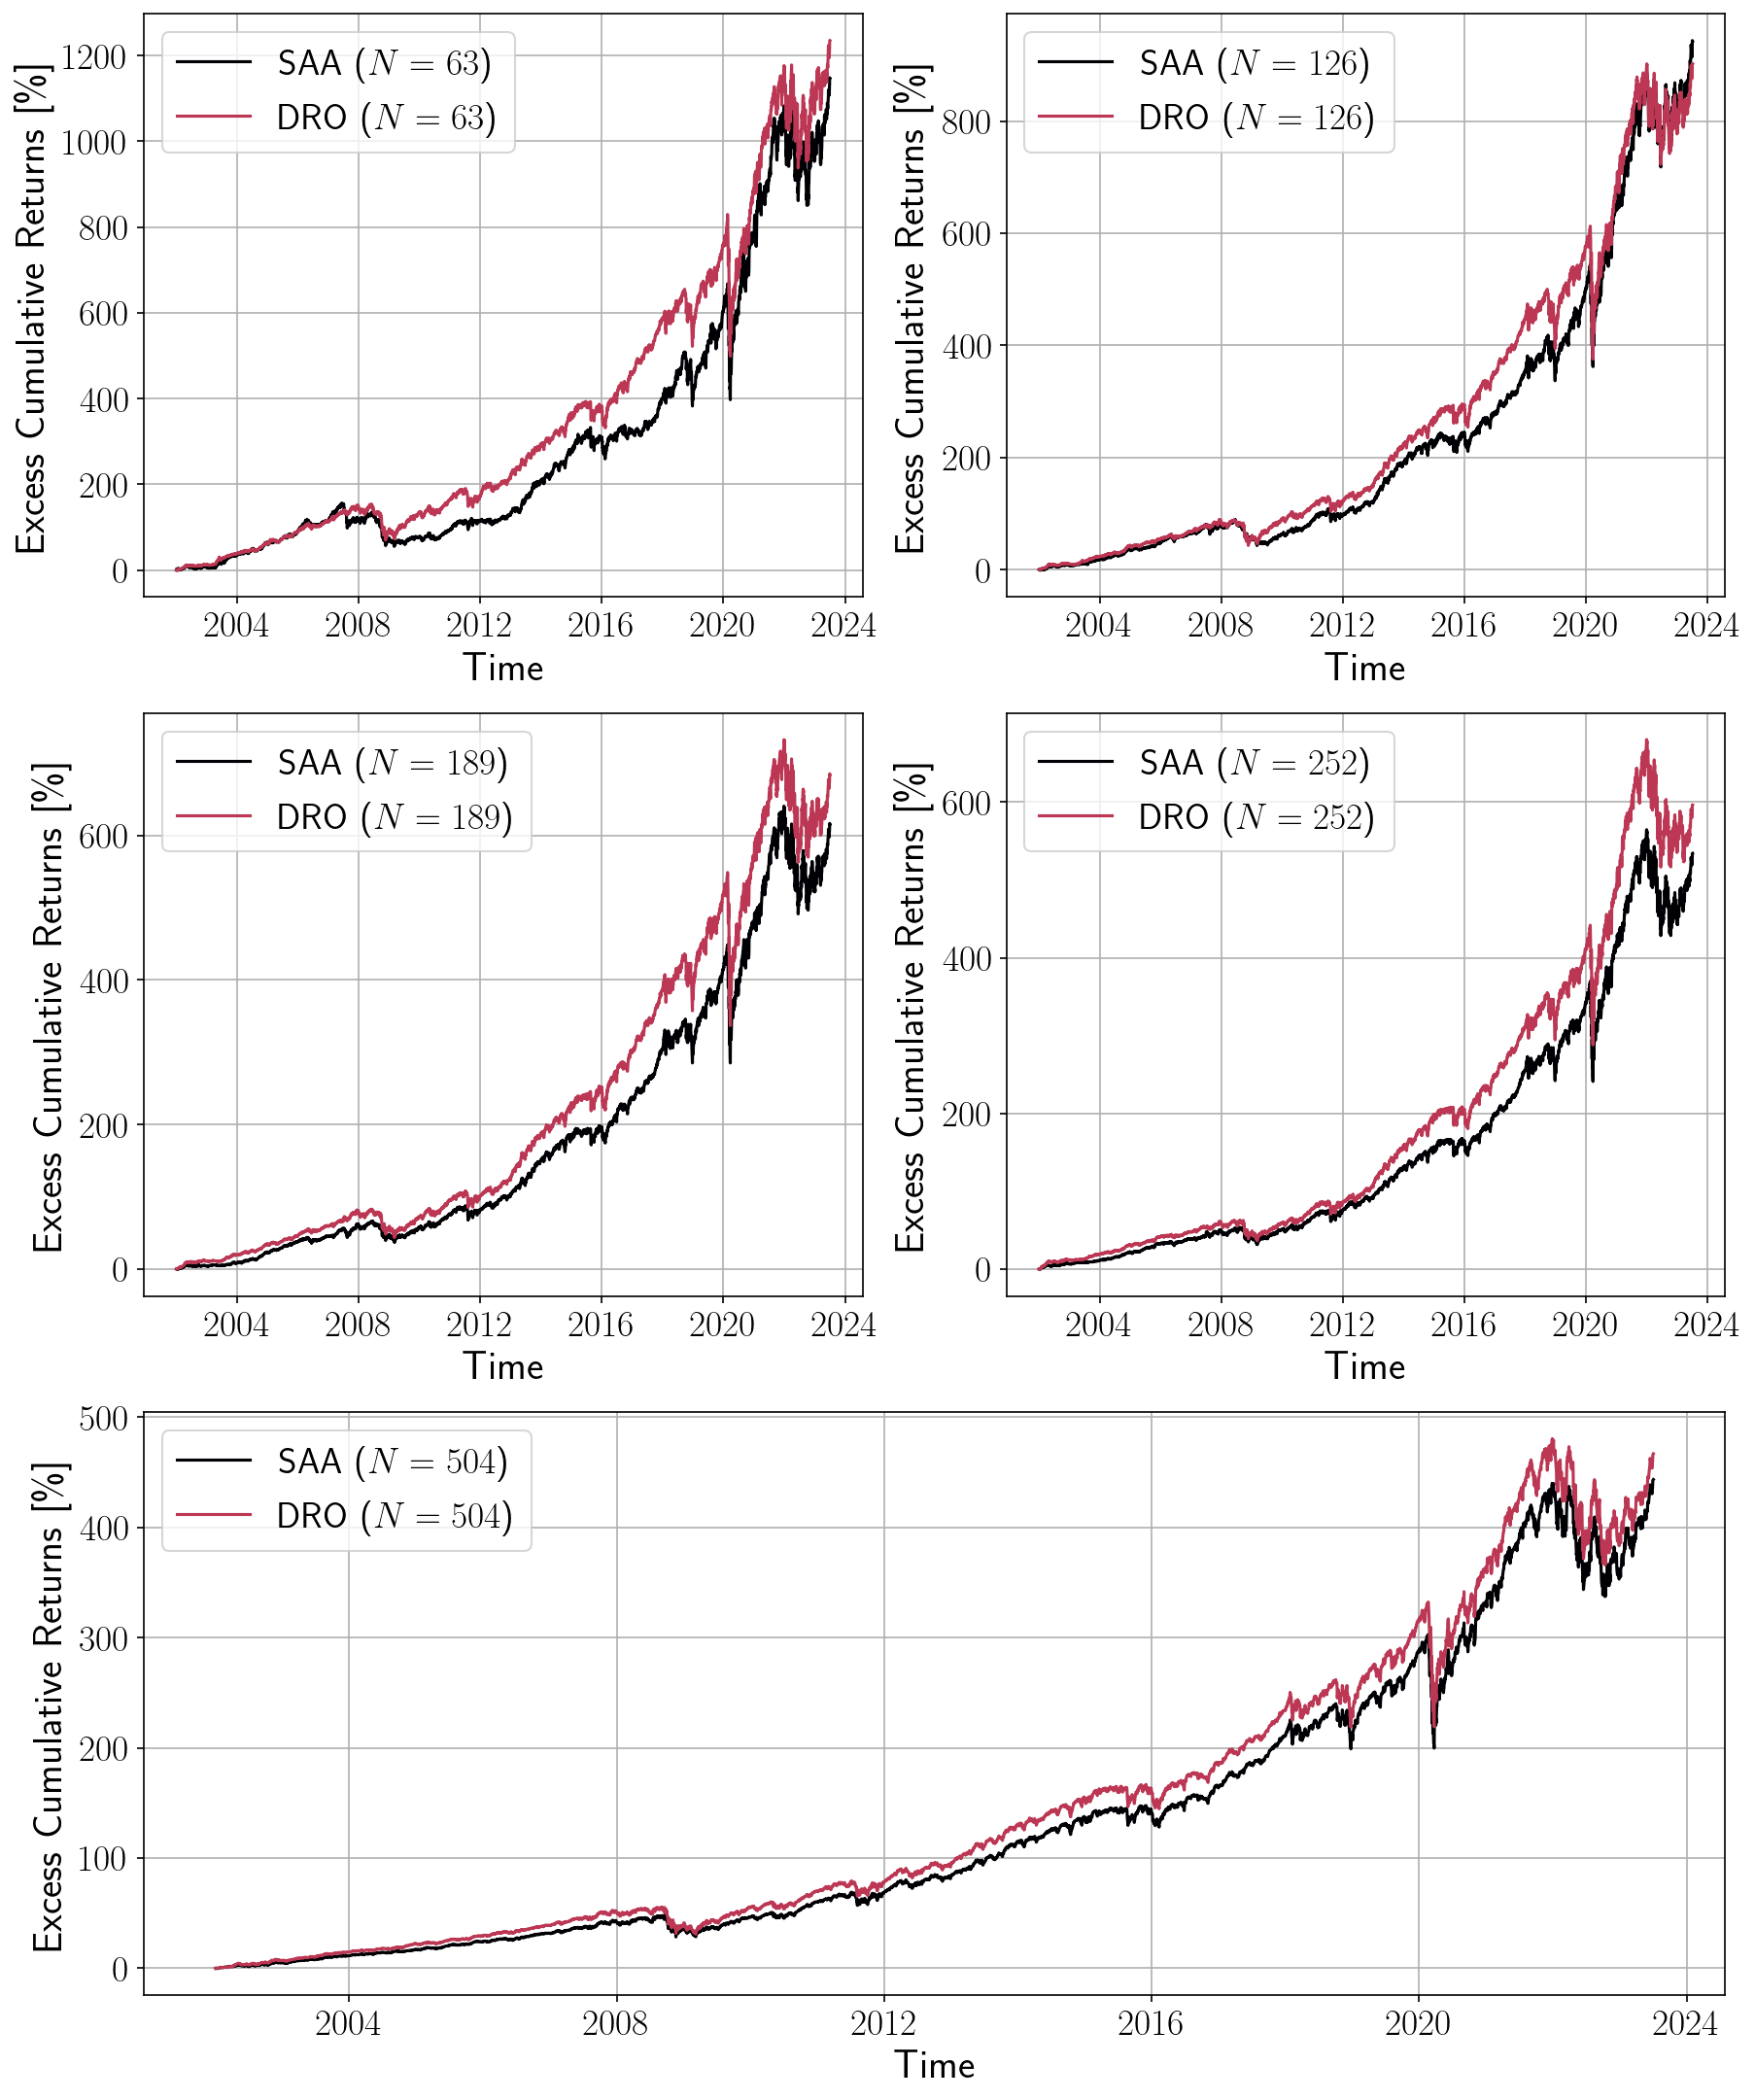

In [15]:
# Prepare plot settings
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Control settings
xlabel=r'Time'
ylabel=r'Excess Cumulative Returns [\%]'
legend_loc="upper left"

# Prepare plots using gridspec
fig = plt.figure(figsize=(14, 18), dpi=150)
gs = gridspec.GridSpec(3, 2, height_ratios=[1,1, 1], width_ratios=[1, 1])

# Specify which sample size to plot for
TX = 0
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 0])
ax1.plot(compatableDates, excessResultsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessResultsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 1
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 1])
ax1.plot(compatableDates, excessResultsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessResultsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Specify which sample size to plot for
TX = 2
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[1, 0])
ax1.plot(compatableDates, excessResultsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessResultsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 3
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[1, 1])
ax1.plot(compatableDates, excessResultsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessResultsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 4
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[2, :])
ax1.plot(compatableDates, excessResultsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessResultsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = f'Backtest_RAERMDRO_Fig4_CUMULATIVE_ABSOLUTE_ALL.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

Then the compounded returns.

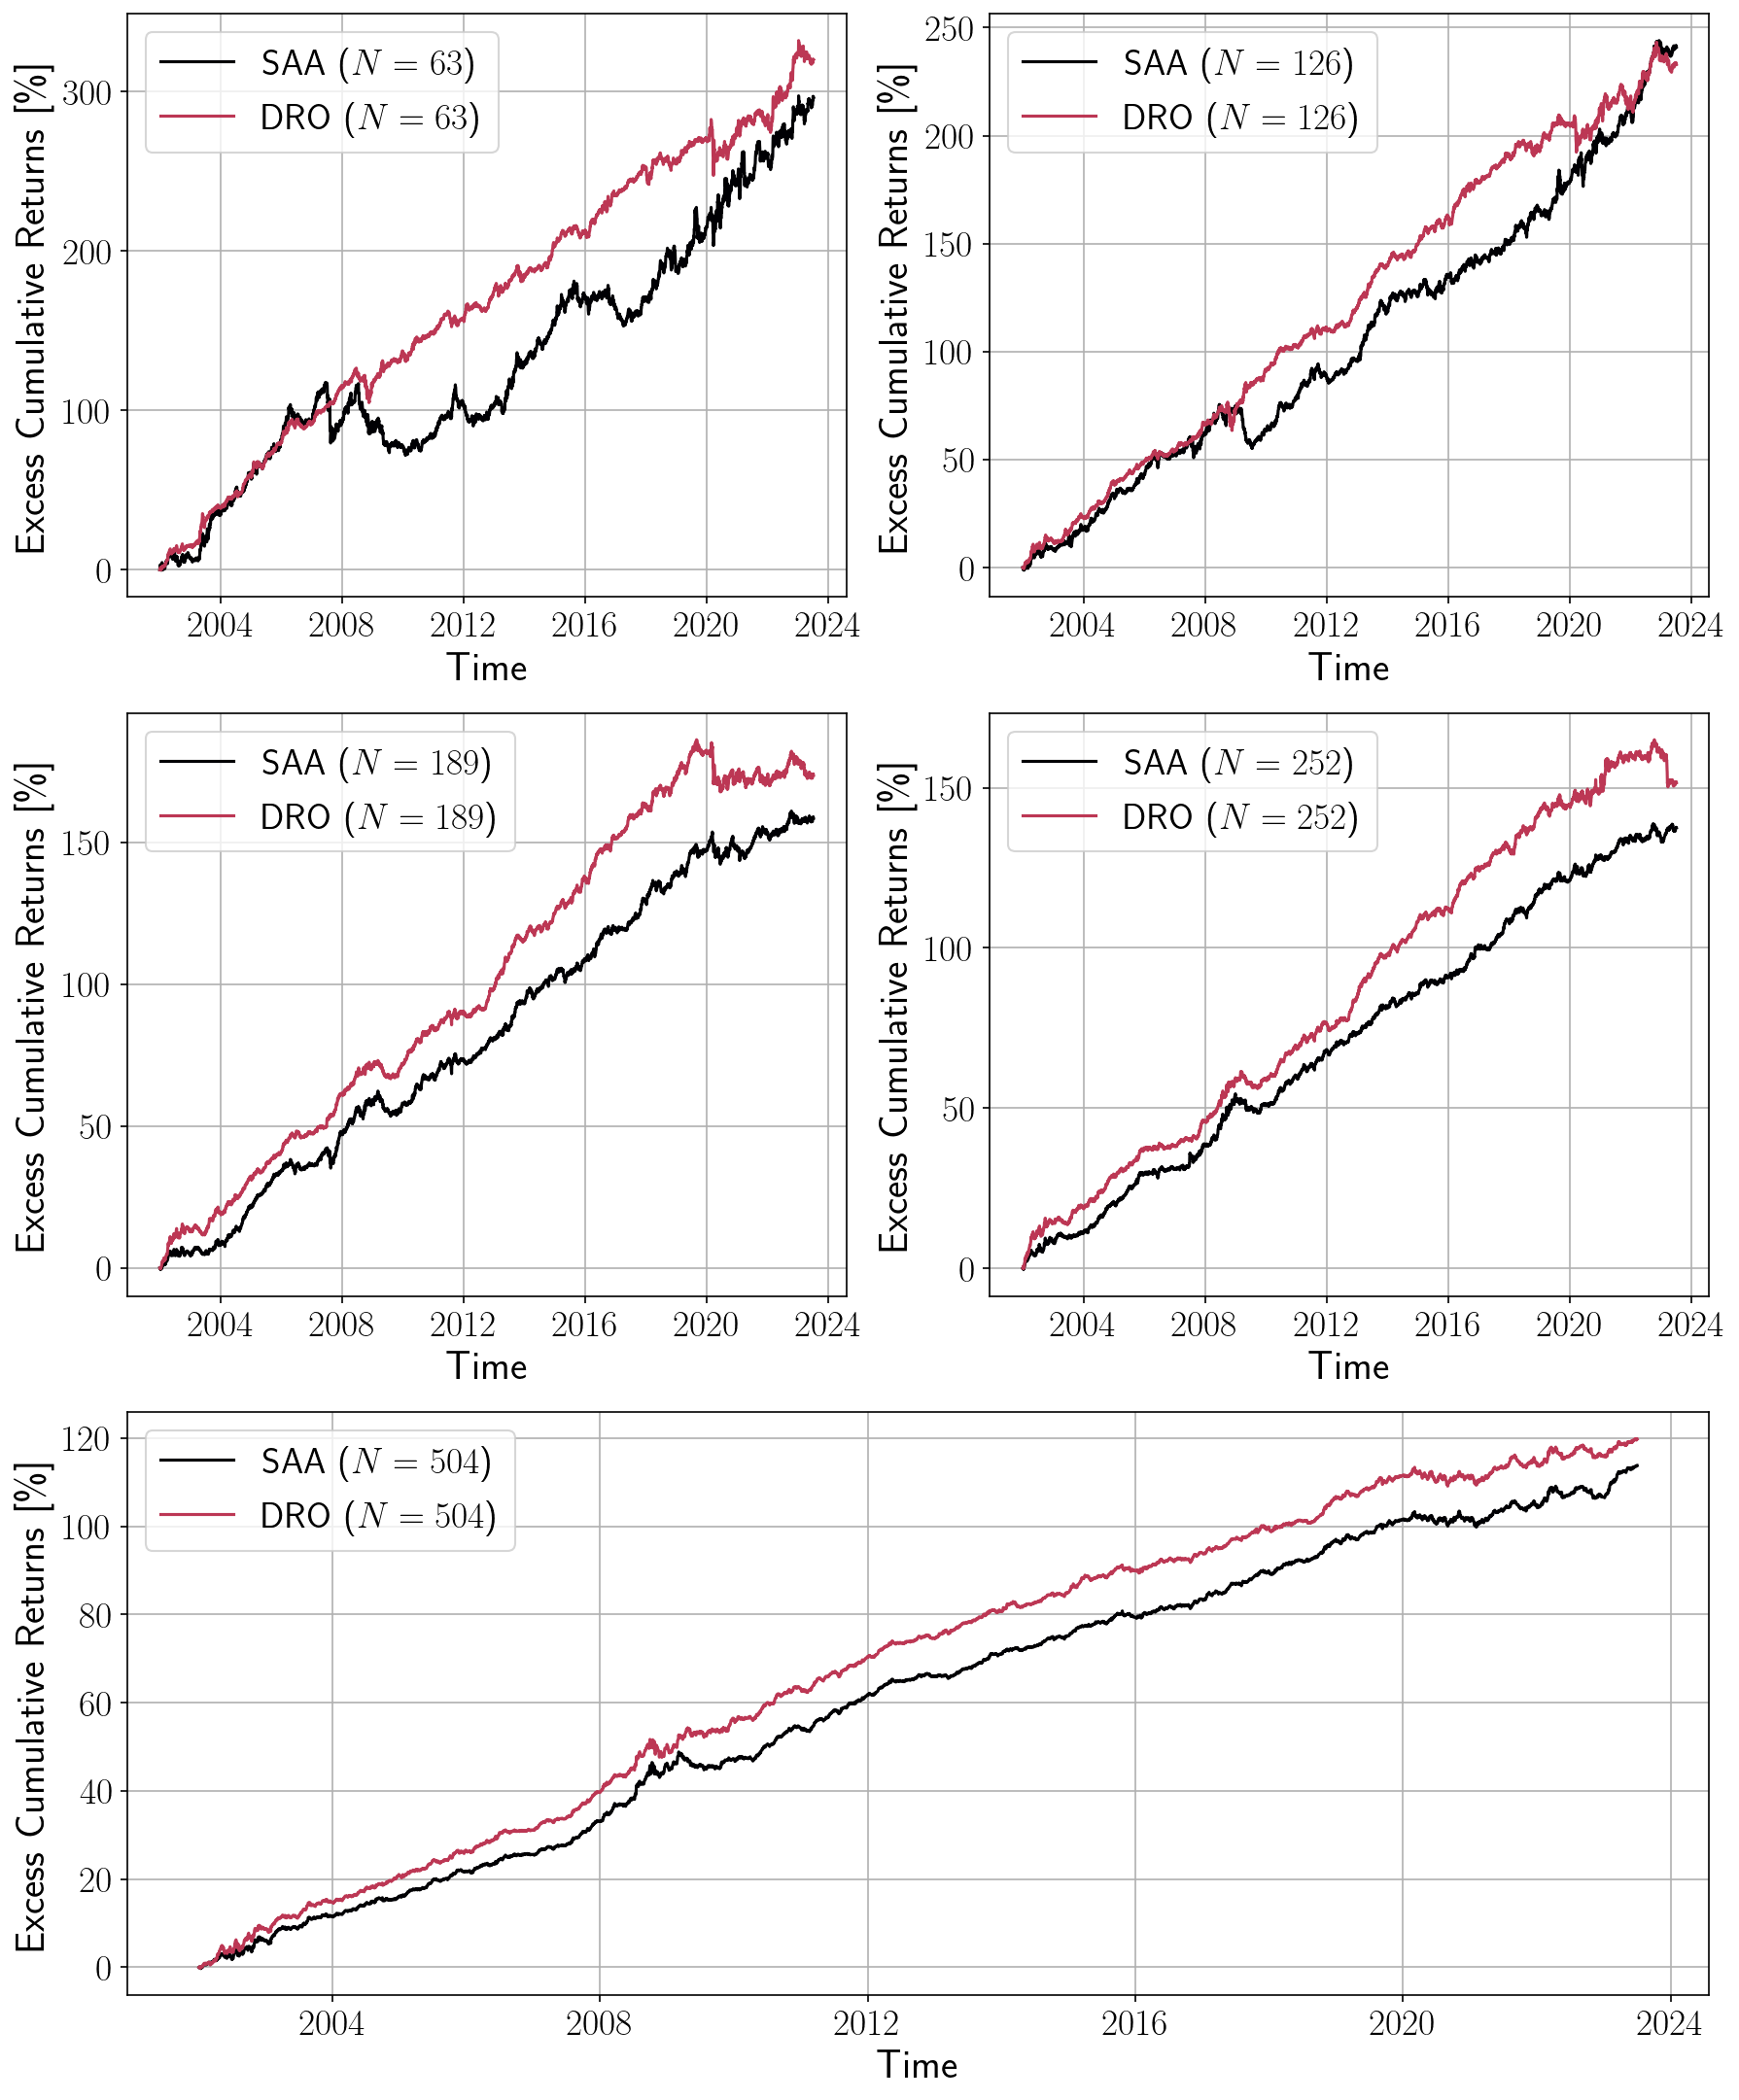

In [16]:
# Prepare plot settings
def_font_size = 18
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Control settings
xlabel=r'Time'
ylabel=r'Excess Cumulative Returns [\%]'
legend_loc="upper left"

# Prepare plots using gridspec
fig = plt.figure(figsize=(14, 18), dpi=150)
gs = gridspec.GridSpec(3, 2, height_ratios=[1,1, 1], width_ratios=[1, 1])

# Specify which sample size to plot for
TX = 0
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 0])
ax1.plot(compatableDates, excessCompoundedReturnsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessCompoundedReturnsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 1
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[0, 1])
ax1.plot(compatableDates, excessCompoundedReturnsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessCompoundedReturnsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Specify which sample size to plot for
TX = 2
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[1, 0])
ax1.plot(compatableDates, excessCompoundedReturnsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessCompoundedReturnsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 3
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[1, 1])
ax1.plot(compatableDates, excessCompoundedReturnsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessCompoundedReturnsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Plot
TX = 4
selectedSize = trainingSizes[TX]
ax1 = plt.subplot(gs[2, :])
ax1.plot(compatableDates, excessCompoundedReturnsSAA[TX,:], label=f'SAA ($N = {selectedSize}$)', color=myMap(0.0))
ax1.plot(compatableDates, excessCompoundedReturnsDRO[TX,:], label=f'DRO ($N = {selectedSize}$)', color=myMap(0.5))
ax1.set_xlabel(xlabel, fontsize=def_font_size+2)
ax1.set_ylabel(ylabel, fontsize=def_font_size+2)
ax1.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax1.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = f'Backtest_RAERMDRO_Fig5_CUMULATIVE_COMPOUNDED_ALL.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

Then we check them relative to each other.

In [17]:
def EWMA(returns, kappa=0.94):
    
    # Allocate memory for volatility
    volatility = np.zeros(len(returns))
    
    # Loop to use EWMA
    for i in range(1, len(volatility)):
        volatility[i] = kappa*volatility[i-1] + (1 - kappa)*(returns[i-1]**2)
        
    # Set the first 4 equal to the fifth
    volatility[:10] = volatility[10]
        
    # Return 
    return volatility

def EWMA_corr(A,B, kappa=0.94):

    # Allocate memory for volatility
    correlation = np.zeros(len(returns))
    
    # Loop to use EWMA
    for i in range(1, len(volatility)):
        correlation[i] = kappa*correlation[i-1] + (1 - kappa)*((A[i-1]-np.mean(A))*(B[i-1]-np.mean(B)))
        
    # Set the first 4 equal to the fifth
    volatility[:10] = volatility[10]
        
    # Return 
    return volatility

def MVA(volatility, past=5):
    
    # Allocate memory
    smoothed_volatility = volatility.copy()
    
    # Find displacement
    d = (past-1)//2
    
    for i in range(d, len(volatility) - d):
        smoothed_volatility[i] = np.mean(volatility[i-d:i+d+1])
        
    # Return the smoothing
    return smoothed_volatility
    
indexReturns = trajectories[0,:,0] - 1
volatility = EWMA(indexReturns, kappa=0.94)
smoothed_volatility = MVA(volatility, past=21)

In [18]:
rebalanceIndices = np.array([i for i, date in enumerate(compatableDates) if date in rebalanceDates])

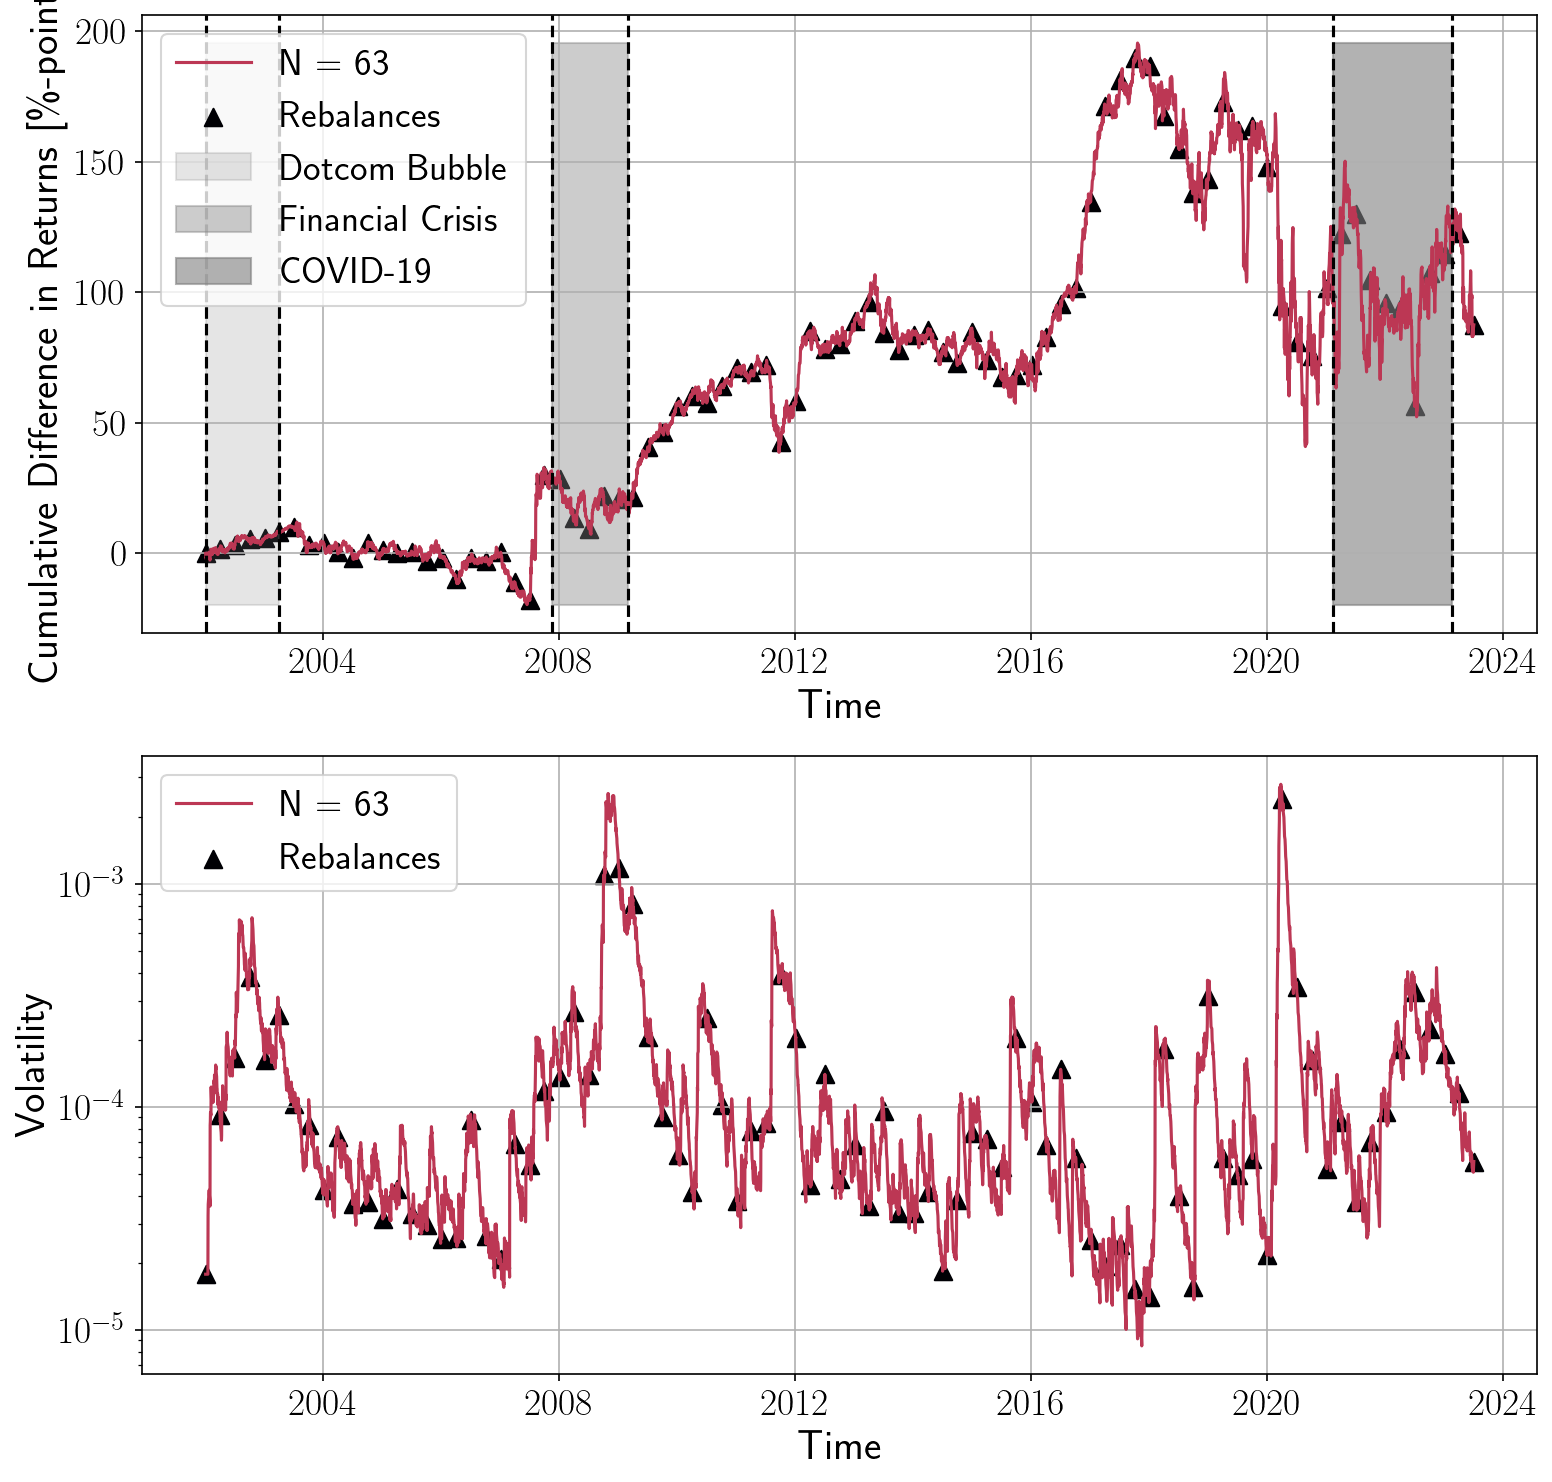

In [19]:
# Control settings
xlabel = r'Time'
ylabel = r'Cumulative Difference in Returns [\%-points]'
legend_loc = "upper left"
def_font_size = 18

# Plot
fig = plt.figure(figsize=(12, 12), dpi=150)
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1], width_ratios=[1])

plt.rcParams.update({'font.size': def_font_size})

# Choose sample size N
TX = 0

# Get the returns
returns = excessResultsDRO - excessResultsSAA
returns = returns[TX,:]

# Calculate correlation
correlation = EWMA_corr(np.diff(returns/100), volatility[1:])

# Make first plot
ax = plt.subplot(gs[0, 0])
ax.plot(compatableDates, returns, alpha=1, color=myMap(0.5), label=f"N = {trainingSizes[TX]}")
ax.scatter(rebalanceDates, returns[rebalanceIndices], label='Rebalances', marker='^', color=myMap(0.0), s=70)

# Add vertical lines to encapsulate periods (adjust the dates accordingly)
ax.axvline(x=compatableDates[0], color='black', linestyle='--')
ax.axvline(x=compatableDates[310], color='black', linestyle='--')
ax.axvline(x=compatableDates[1470], color='black', linestyle='--')
ax.axvline(x=compatableDates[1785], color='black', linestyle='--')
ax.axvline(x=compatableDates[4770], color='black', linestyle='--')
ax.axvline(x=compatableDates[5274], color='black', linestyle='--')

# Add shading between the vertical lines
ax.fill_betweenx(y=[min(returns), max(returns)], x1=compatableDates[0], x2=compatableDates[310], color='gray', alpha=0.2, label='Dotcom Bubble')
ax.fill_betweenx(y=[min(returns), max(returns)], x1=compatableDates[1470], x2=compatableDates[1785], color='gray', alpha=0.4, label='Financial Crisis')
ax.fill_betweenx(y=[min(returns), max(returns)], x1=compatableDates[4770], x2=compatableDates[5274], color='gray', alpha=0.6, label='COVID-19')

# Set labels
ax.set_xlabel(xlabel, fontsize=def_font_size+2)
ax.set_ylabel(ylabel, fontsize=def_font_size+2)
ax.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax.grid(True)

# Next figure
ax = plt.subplot(gs[1, 0])
ax.plot(compatableDates, volatility, alpha=1, color=myMap(0.5), label=f"N = {trainingSizes[TX]}")
ax.scatter(rebalanceDates, volatility[rebalanceIndices], label='Rebalances', marker='^', color=myMap(0.0), s=70)
xlabel = r'Time'
ylabel = r'Volatility'
legend_loc = "upper left"
ax.set_xlabel(xlabel, fontsize=def_font_size+2)
ax.set_ylabel(ylabel, fontsize=def_font_size+2)
ax.set_yscale('log')
ax.legend(loc=legend_loc, facecolor="white", fontsize=def_font_size)
ax.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = f'Backtest_RAERMDRO_Fig6_Vol_Corr_{trainingSizes[TX]}.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

### Plots of Selected Wasserstein Radii

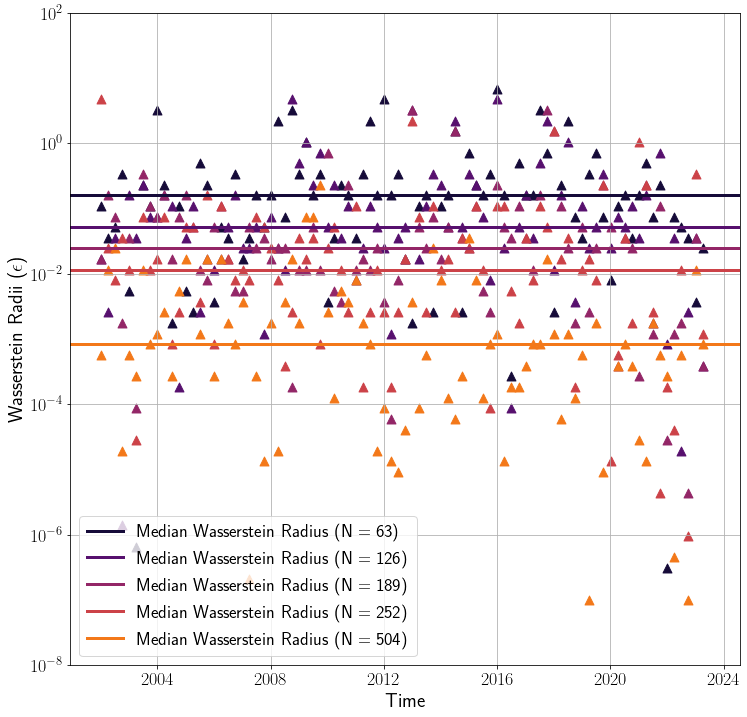

In [20]:
# Control settings
xlabel=r'Time'
ylabel=r'Wasserstein Radii ($\epsilon$)'
legend_loc="lower left"
def_font_size = 18

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
plt.rcParams.update({'font.size': def_font_size})
ax.scatter(rebalanceDates, epsOpt[0,:], marker='^', color=myMap(0.10), s=80)
ax.axhline(y=np.median(epsOpt[0,:]), color=myMap(0.10), linestyle='-', linewidth=3, label='Median Wasserstein Radius (N = 63)')
ax.scatter(rebalanceDates, epsOpt[1,:], marker='^', color=myMap(0.25), s=80)
ax.axhline(y=np.median(epsOpt[1,:]), color=myMap(0.25), linestyle='-', linewidth=3, label='Median Wasserstein Radius (N = 126)')
ax.scatter(rebalanceDates, epsOpt[2,:], marker='^', color=myMap(0.40), s=80)
ax.axhline(y=np.median(epsOpt[2,:]), color=myMap(0.40), linestyle='-', linewidth=3, label='Median Wasserstein Radius (N = 189)')
ax.scatter(rebalanceDates, epsOpt[3,:], marker='^', color=myMap(0.55), s=80)
ax.axhline(y=np.median(epsOpt[3,:]), color=myMap(0.55), linestyle='-', linewidth=3, label='Median Wasserstein Radius (N = 252)')
ax.scatter(rebalanceDates, epsOpt[4,:], marker='^', color=myMap(0.70), s=80)
ax.axhline(y=np.median(epsOpt[4,:]), color=myMap(0.70), linestyle='-', linewidth=3, label='Median Wasserstein Radius (N = 504)')

ax.set_xlabel(xlabel, fontsize=def_font_size+2)
ax.set_ylabel(ylabel, fontsize=def_font_size+2)
ax.set_yscale('log')
ax.legend(loc=legend_loc)
ax.grid(True)
ax.set_ylim(10**(-8), 100)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = 'Backtest_RAERMDRO_Fig7_WassersteinRadius_TWO.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show figure
plt.show()

### Plots of In-Sample vs. Out-of-Sample

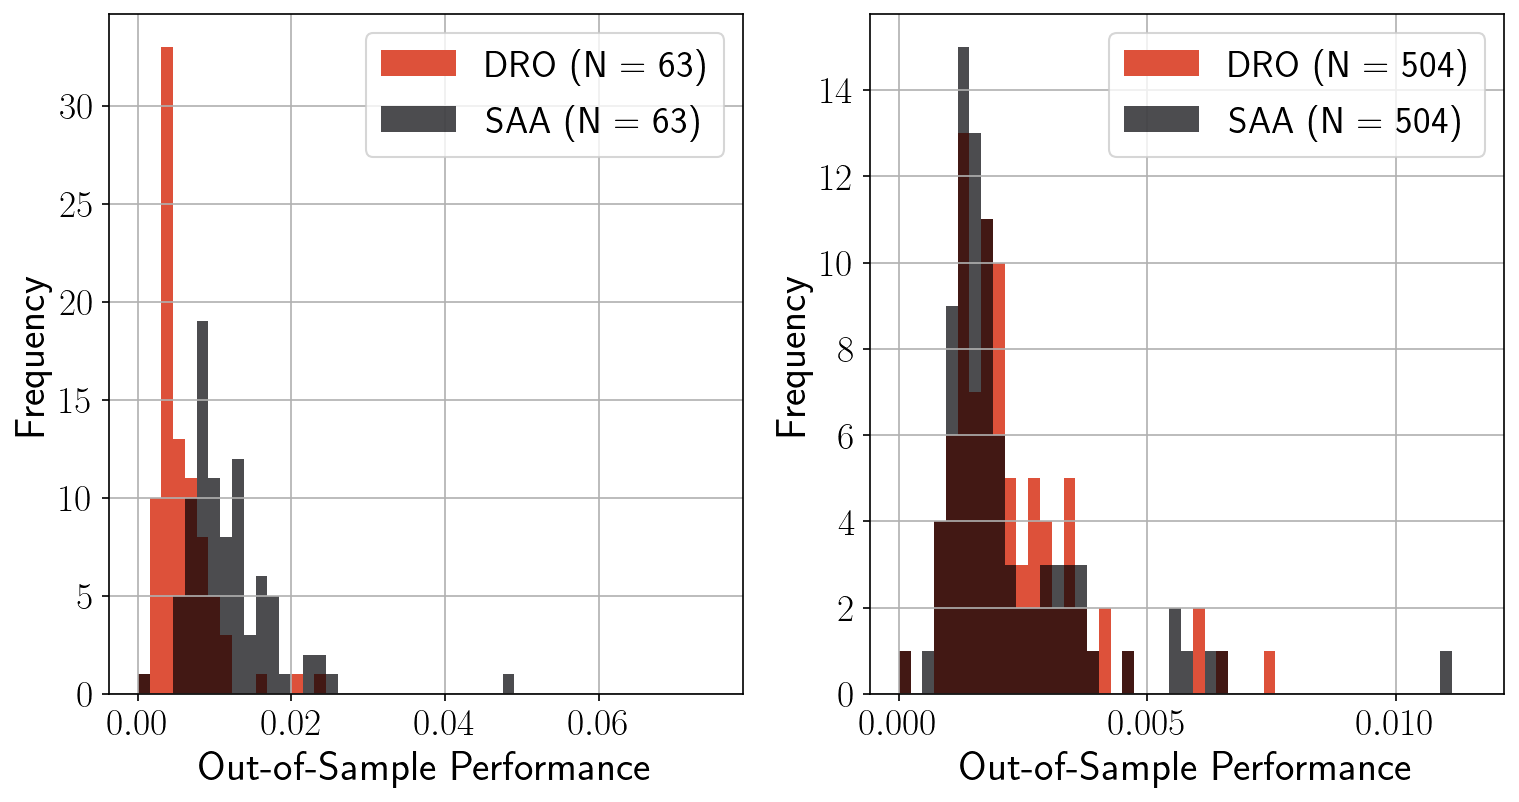

In [21]:
# Settings for plot
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
def_font_size = 12
plt.rcParams.update({'font.size': def_font_size})
myMap = plt.get_cmap('inferno') # Paired, inferno

# Instantiate plot
def_font_size = 18
fig = plt.figure(figsize=(12, 6), dpi=150)
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})

# Plot for N = 126
TX = 0

#
ax = plt.subplot(gs[0,0])

IS_SAA_objective = IS_statistics[0,TX,:,0]
OoS_SAA_objective = OoS_statistics[0,TX,:,0]
IS_DRO_objective = IS_statistics[1,TX,:,0]
OoS_DRO_objective = OoS_statistics[1,TX,:,0]

# Plot histograms
PDD_DRO = OoS_DRO_objective - IS_DRO_objective
PDD_SAA = OoS_SAA_objective - IS_SAA_objective
bin_edges = np.linspace(min(min(OoS_DRO_objective), min(OoS_SAA_objective)), max(max(PDD_DRO), max(PDD_SAA)), 50)  # 25 bins
ax.hist(OoS_DRO_objective, bins=bin_edges, alpha=1, label=f'DRO (N = {trainingSizes[TX]})', color=myMap(0.6))
ax.hist(OoS_SAA_objective, bins=bin_edges, alpha=0.7, label=f'SAA (N = {trainingSizes[TX]})', color=myMap(0.0))

# Add labels and legend
ax.set_xlabel('Out-of-Sample Performance', fontsize=def_font_size+2)
ax.set_ylabel('Frequency', fontsize=def_font_size+2)
ax.legend()
ax.grid(True)

# Plot for N = 504
TX = -1

#
ax = plt.subplot(gs[0,1])

IS_SAA_objective = IS_statistics[0,TX,:,0]
OoS_SAA_objective = OoS_statistics[0,TX,:,0]
IS_DRO_objective = IS_statistics[1,TX,:,0]
OoS_DRO_objective = OoS_statistics[1,TX,:,0]

# Plot histograms
PDD_DRO = OoS_DRO_objective - IS_DRO_objective
PDD_SAA = OoS_SAA_objective - IS_SAA_objective
bin_edges = np.linspace(min(min(OoS_DRO_objective), min(OoS_SAA_objective)), max(max(PDD_DRO), max(PDD_SAA)), 50)  # 25 bins
ax.hist(OoS_DRO_objective, bins=bin_edges, alpha=1, label=f'DRO (N = {trainingSizes[TX]})', color=myMap(0.6))
ax.hist(OoS_SAA_objective, bins=bin_edges, alpha=0.7, label=f'SAA (N = {trainingSizes[TX]})', color=myMap(0.0))

# Add labels and legend
ax.set_xlabel('Out-of-Sample Performance', fontsize=def_font_size+2)
ax.set_ylabel('Frequency', fontsize=def_font_size+2)
ax.legend()
ax.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = f'Backtest_RAERMDRO_Fig8_OoSDistribution_TWO.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

Let's look at the distribution of Sortino ratios.

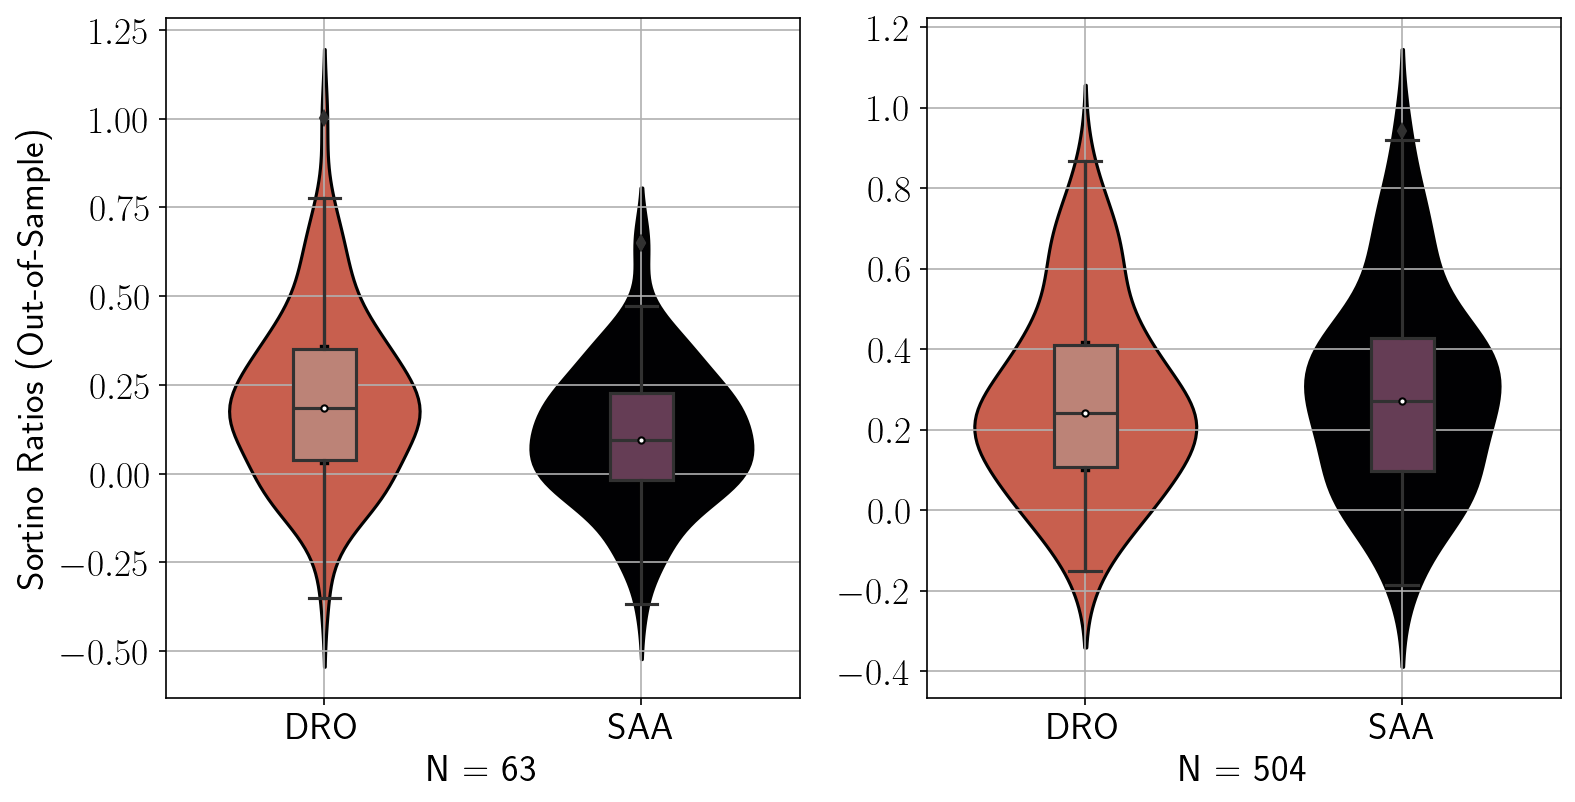

In [22]:
# Instantiate plot
def_font_size = 18
fig = plt.figure(figsize=(12, 6), dpi=150)
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['xtick.labelsize'] = def_font_size;
plt.rcParams['ytick.labelsize'] = def_font_size;

# Create two subplots (axes)
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot

TX = 0

# Sample data
statisticsIndex = 8
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax1, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax1, saturation=0.40)

# Add labels and legend to the first subplot
ax1.set_xlabel(f'N = {trainingSizes[TX]}')
ax1.set_ylabel('Sortino Ratios (Out-of-Sample)')
ax1.grid(True)

# Repeat for the second subplot (ax2) if needed
TX = -1

# Sample data
statisticsIndex = 8
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax2, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax2, saturation=0.40)

# Add labels and legend to the first subplot
ax2.set_xlabel(f'N = {trainingSizes[TX]}')
ax2.set_ylabel('')
ax2.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = f'Backtest_RAERMDRO_Fig9_SortinoDistribution_{trainingSizes[TX]}.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

Then we create a figure for the appendix where all of them are present.

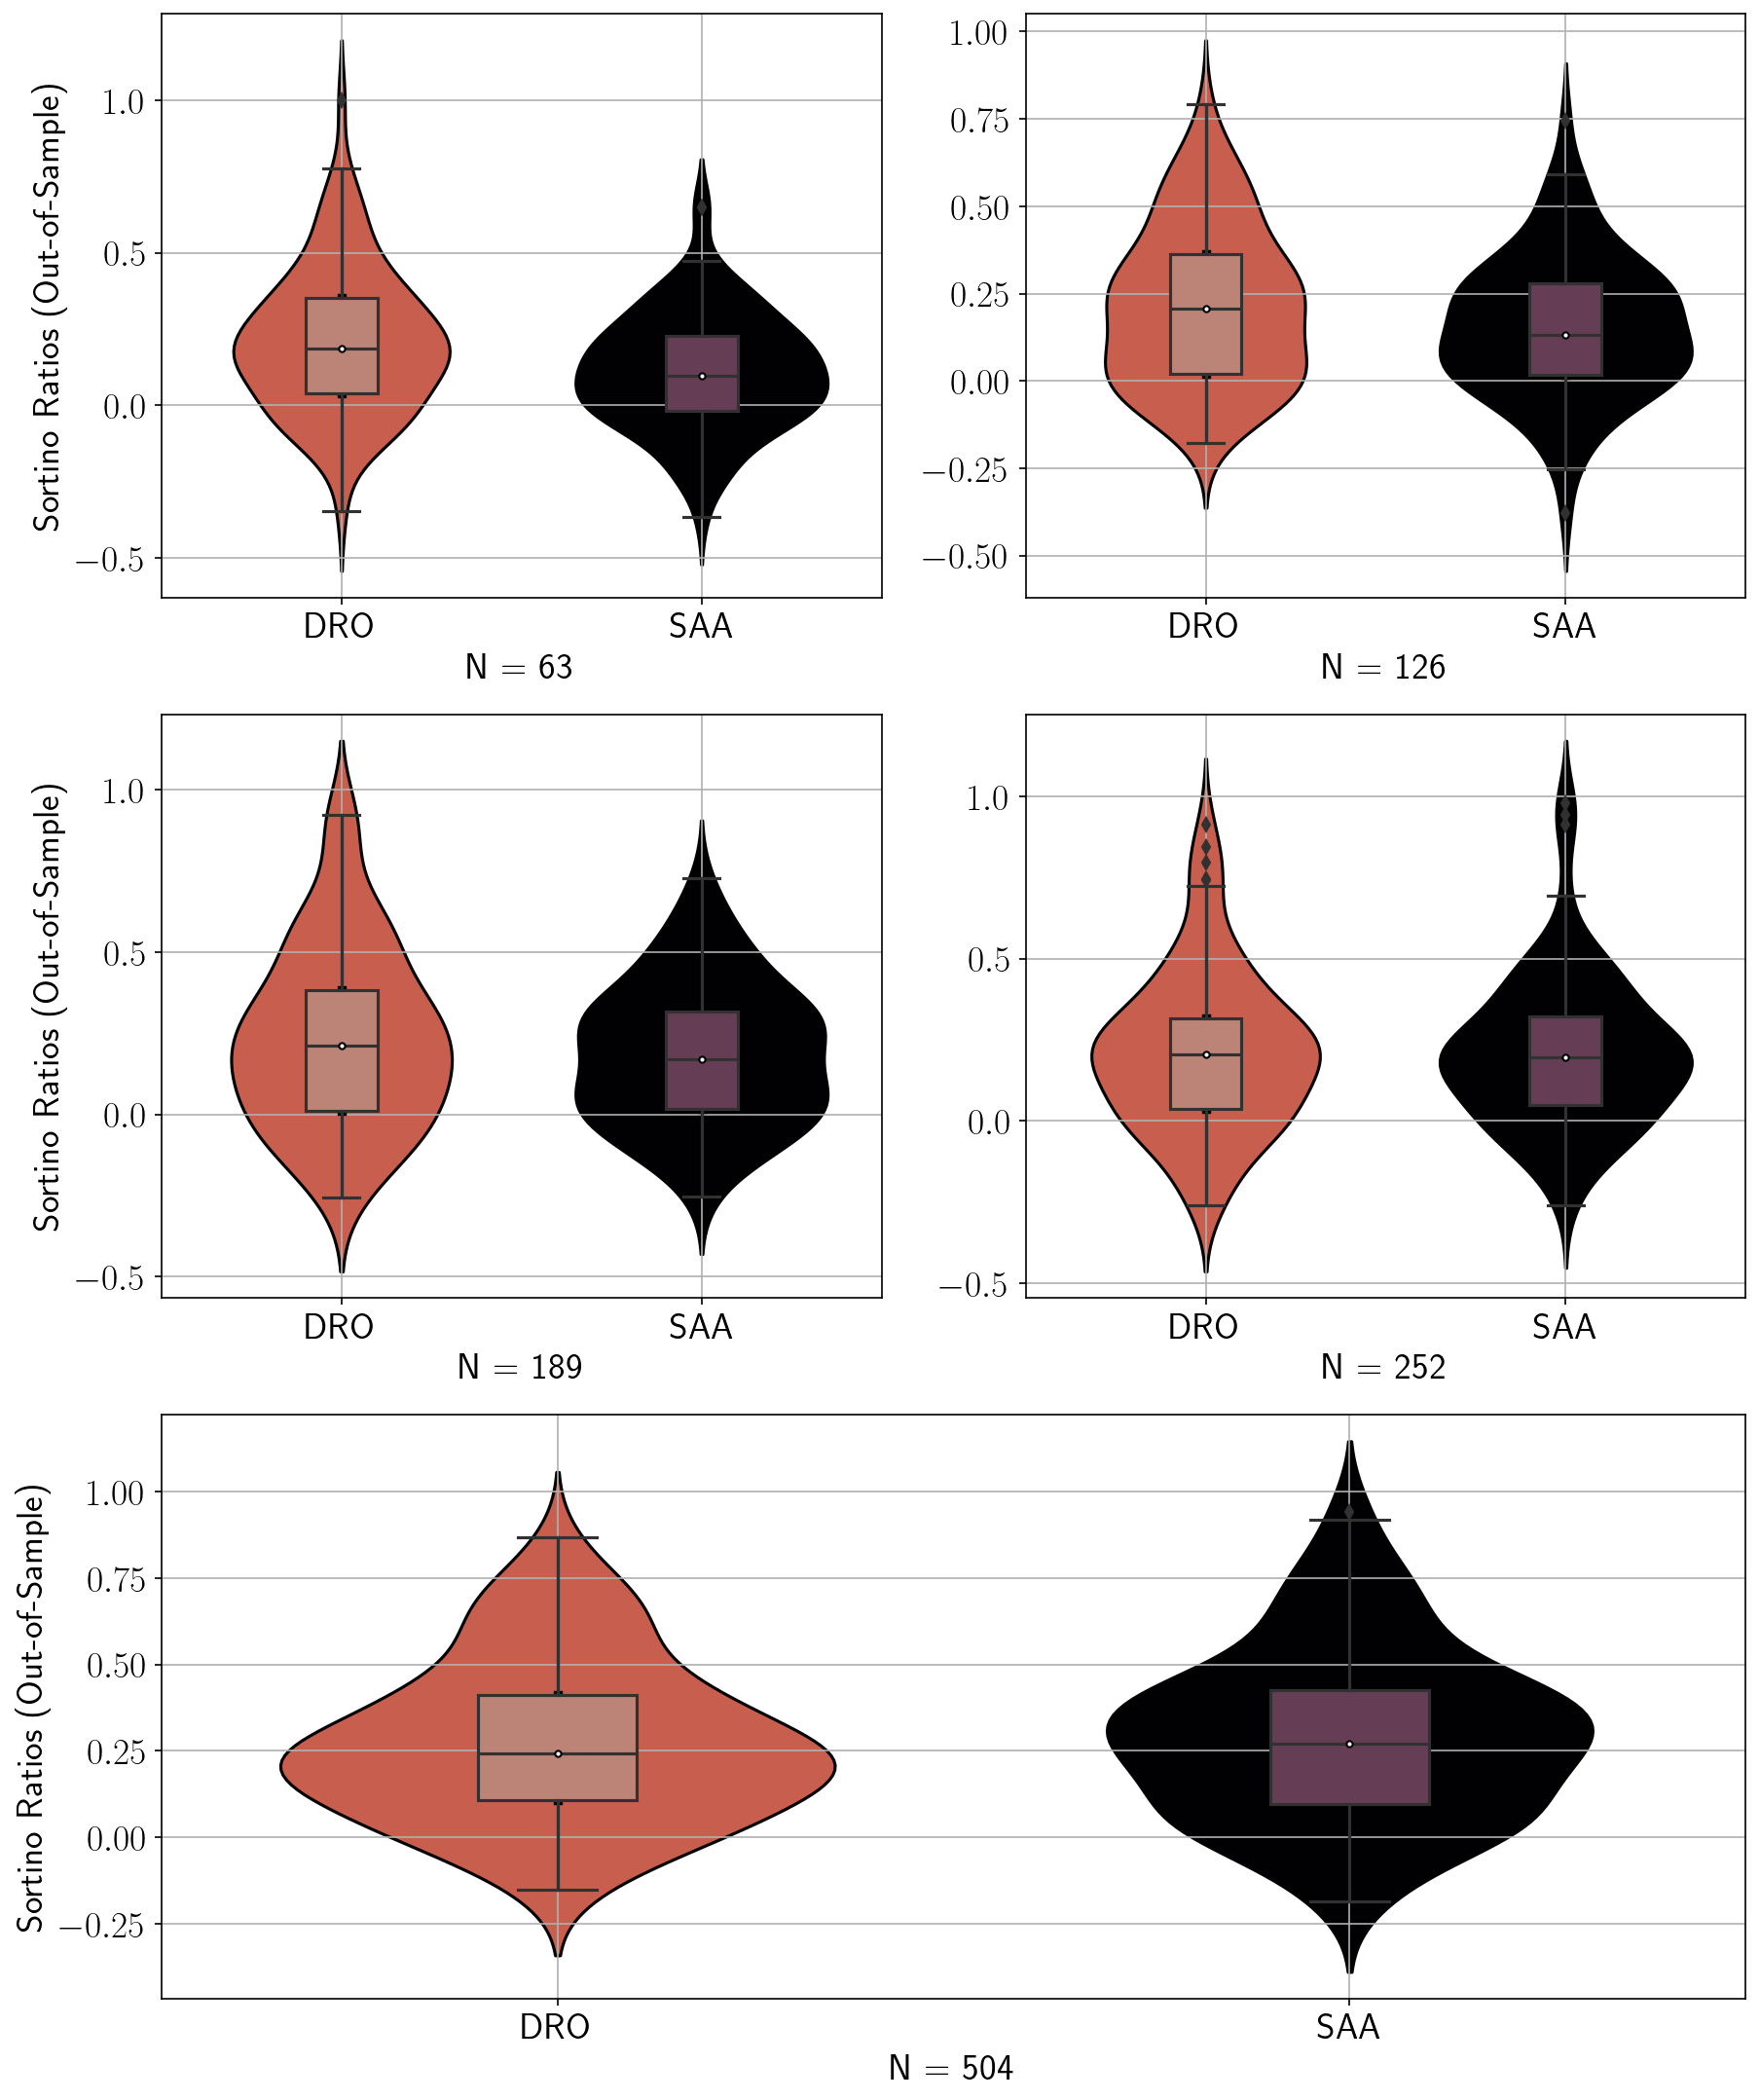

In [23]:
# Instantiate plot
def_font_size = 18
fig = plt.figure(figsize=(14, 18), dpi=150)
gs = gridspec.GridSpec(3, 2, height_ratios=[1,1,1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['xtick.labelsize'] = def_font_size;
plt.rcParams['ytick.labelsize'] = def_font_size;

# Create two subplots (axes)
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot
ax3 = fig.add_subplot(gs[1, 0])  # Third subplot
ax4 = fig.add_subplot(gs[1, 1])  # Fourth subplot
ax5 = fig.add_subplot(gs[2, :])  # Fifth subplot

TX = 0

# Sample data
statisticsIndex = 8
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax1, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax1, saturation=0.40)

# Add labels and legend to the first subplot
ax1.set_xlabel(f'N = {trainingSizes[TX]}')
ax1.set_ylabel('Sortino Ratios (Out-of-Sample)')
ax1.grid(True)

# Repeat for the next
TX = 1

# Sample data
statisticsIndex = 8
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax2, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax2, saturation=0.40)

# Add labels and legend to the first subplot
ax2.set_xlabel(f'N = {trainingSizes[TX]}')
ax2.set_ylabel('')
ax2.grid(True)

# Repeat for the next
TX = 2

# Sample data
statisticsIndex = 8
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax3, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax3, saturation=0.40)

# Add labels and legend to the first subplot
ax3.set_xlabel(f'N = {trainingSizes[TX]}')
ax3.set_ylabel('Sortino Ratios (Out-of-Sample)')
ax3.grid(True)

# Repeat for the next
TX = 3

# Sample data
statisticsIndex = 8
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax4, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax4, saturation=0.40)

# Add labels and legend to the first subplot
ax4.set_xlabel(f'N = {trainingSizes[TX]}')
ax4.set_ylabel('')
ax4.grid(True)

# Repeat for the next
TX = 4

# Sample data
statisticsIndex = 8
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax5, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax5, saturation=0.40)

# Add labels and legend to the first subplot
ax5.set_xlabel(f'N = {trainingSizes[TX]}')
ax5.set_ylabel('Sortino Ratios (Out-of-Sample)')
ax5.grid(True)

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = 'Backtest_RAERMDRO_Fig10_SortinoDistribution_ALL.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

Next we investigate the average excess return (AER).

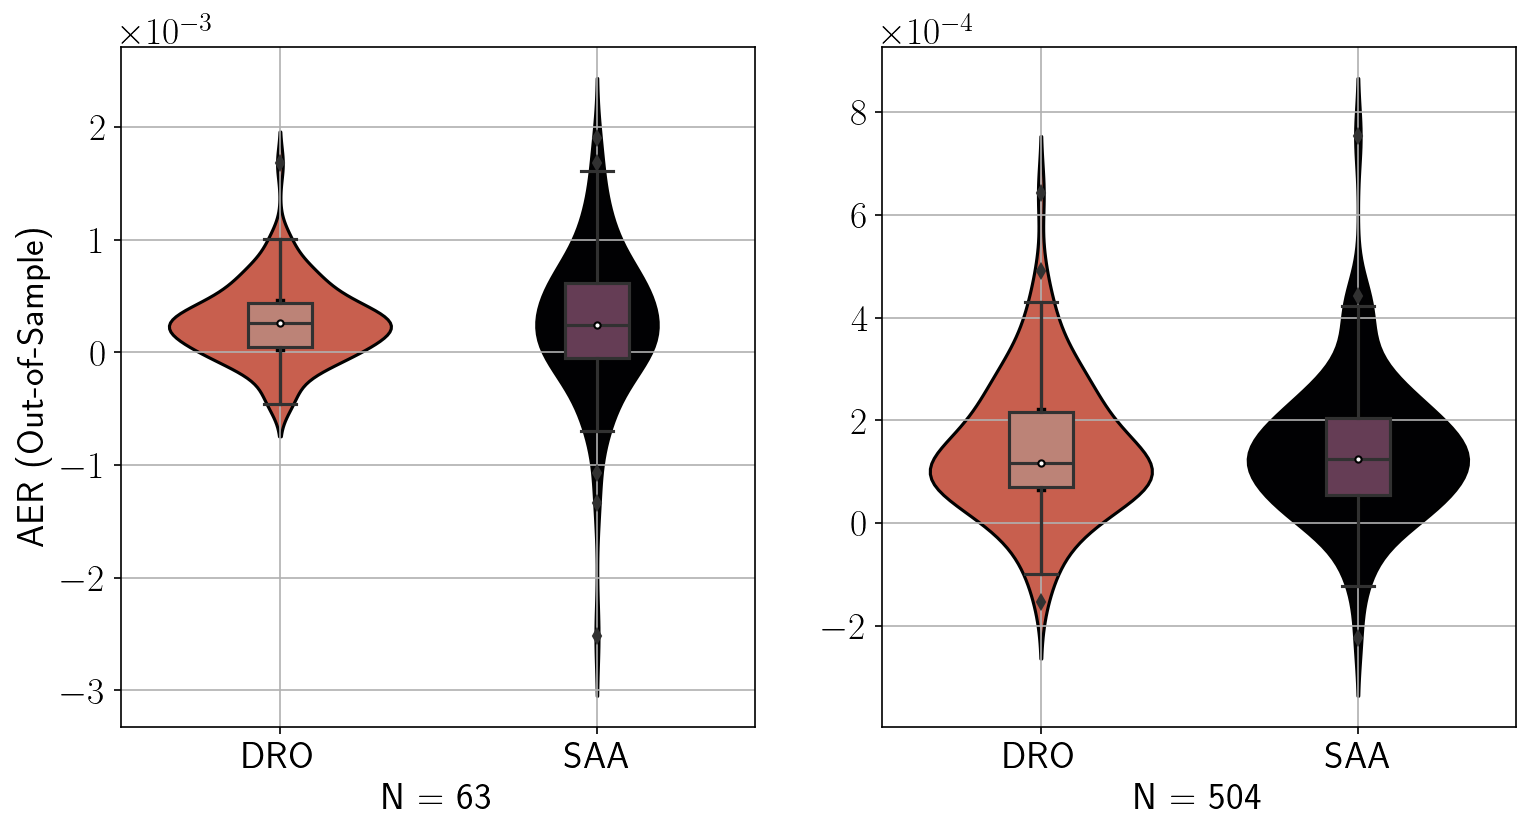

In [24]:
# Instantiate plot
from matplotlib.ticker import ScalarFormatter
def_font_size = 18
fig = plt.figure(figsize=(12, 6), dpi=150)
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})

# Create two subplots (axes)
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot

# Specify tickers
y_tickers_1 = np.arange(-0.002, 0.002, 0.0005)
y_tickers_2 = np.arange(-0.002, 0.002, 0.0005)

TX = 0

# Sample data
statisticsIndex = 6
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax1, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax1, saturation=0.40)

# Add labels and legend to the first subplot
ax1.set_xlabel(f'N = {trainingSizes[TX]}')
ax1.set_ylabel(r'AER (Out-of-Sample)')
#ax1.set_yticks(y_tickers_1)
ax1.grid(True)

# Change format
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Repeat for the second subplot (ax2) if needed
TX = -1

# Sample data
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax2, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax2, saturation=0.40)

# Add labels and legend to the first subplot
ax2.set_xlabel(f'N = {trainingSizes[TX]}')
ax2.set_ylabel('')
#ax2.set_yticks(y_tickers_2)
ax2.ticklabel_format(axis="y",style="scientific")
ax2.grid(True)

# Change format
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = f'Backtest_RAERMDRO_Fig11_ExcessReturnDistribution_{trainingSizes[TX]}.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

Then we create a figure for the appendix where all of them are present.

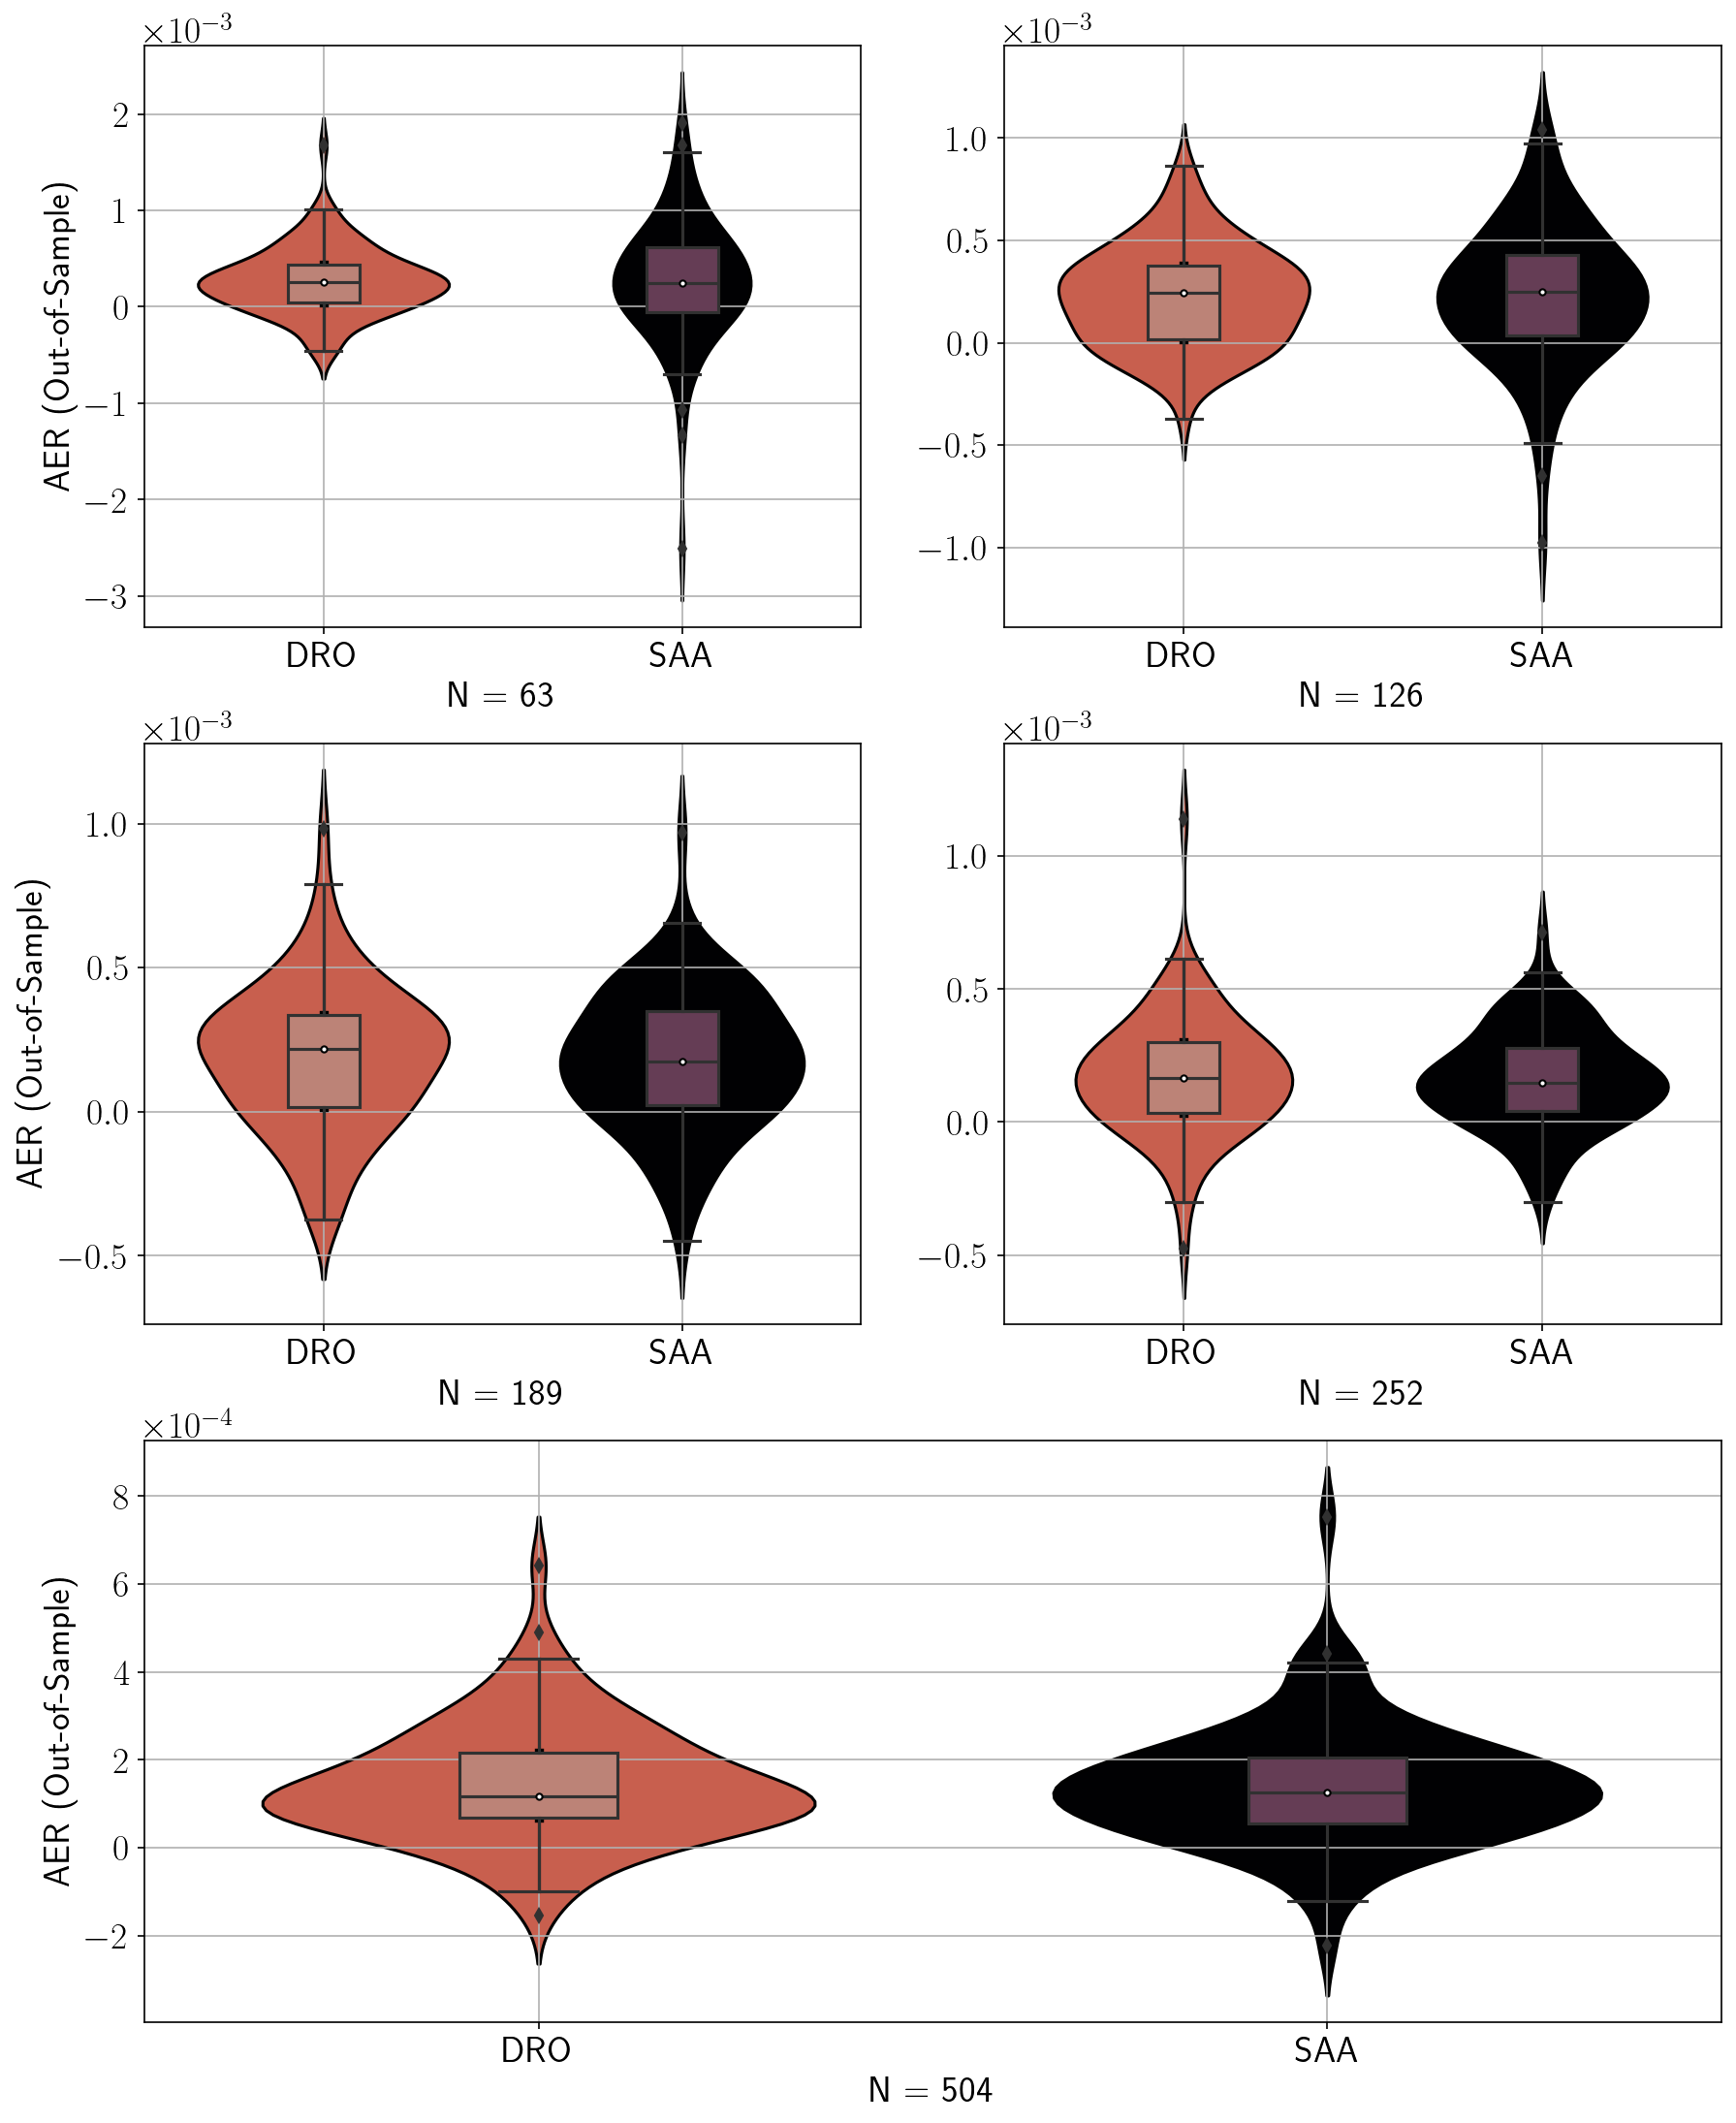

In [25]:
# Instantiate plot
def_font_size = 18
fig = plt.figure(figsize=(14, 18), dpi=150)
gs = gridspec.GridSpec(3, 2, height_ratios=[1,1,1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['xtick.labelsize'] = def_font_size;
plt.rcParams['ytick.labelsize'] = def_font_size;

# Create two subplots (axes)
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot
ax3 = fig.add_subplot(gs[1, 0])  # Third subplot
ax4 = fig.add_subplot(gs[1, 1])  # Fourth subplot
ax5 = fig.add_subplot(gs[2, :])  # Fifth subplot

TX = 0

# Sample data
statisticsIndex = 6
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax1, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax1, saturation=0.40)

# Add labels and legend to the first subplot
ax1.set_xlabel(f'N = {trainingSizes[TX]}')
ax1.set_ylabel('AER (Out-of-Sample)')
ax1.grid(True)
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Repeat for the next
TX = 1

# Sample data
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax2, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax2, saturation=0.40)

# Add labels and legend to the first subplot
ax2.set_xlabel(f'N = {trainingSizes[TX]}')
ax2.set_ylabel('')
ax2.grid(True)
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Repeat for the next
TX = 2

# Sample data
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax3, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax3, saturation=0.40)

# Add labels and legend to the first subplot
ax3.set_xlabel(f'N = {trainingSizes[TX]}')
ax3.set_ylabel('AER (Out-of-Sample)')
ax3.grid(True)
ax3.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Repeat for the next
TX = 3

# Sample data
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax4, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax4, saturation=0.40)

# Add labels and legend to the first subplot
ax4.set_xlabel(f'N = {trainingSizes[TX]}')
ax4.set_ylabel('')
ax4.grid(True)
ax4.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Repeat for the next
TX = 4

# Sample data
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax5, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax5, saturation=0.40)

# Add labels and legend to the first subplot
ax5.set_xlabel(f'N = {trainingSizes[TX]}')
ax5.set_ylabel('AER (Out-of-Sample)')
ax5.grid(True)
ax5.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = 'Backtest_RAERMDRO_Fig12_ExcessReturnDistribution_ALL.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

Then we do the same for risk.

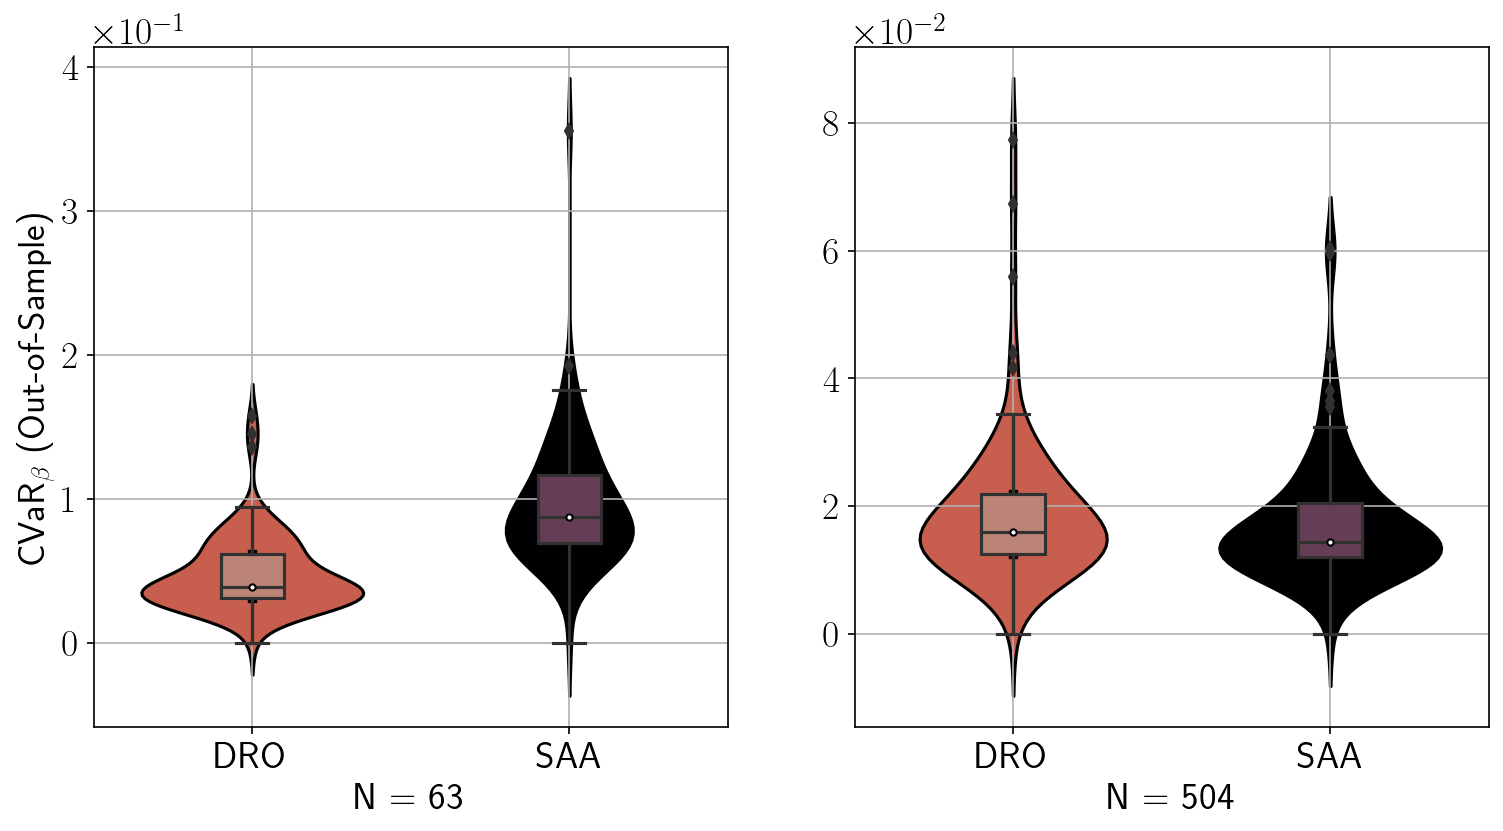

In [26]:
# Instantiate plot
def_font_size = 18
fig = plt.figure(figsize=(12, 6), dpi=150)
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})

# Create two subplots (axes)
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot

# Specify tickers
y_tickers_1 = np.arange(-0.025, 0.225, 0.025)
y_tickers_2 = np.arange(-0.025, 0.225, 0.025)

TX = 0

# Sample data
statisticsIndex = 5
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats * np.sqrt(252), OoS_SAA_stats * np.sqrt(252)])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax1, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax1, saturation=0.40)

# Add labels and legend to the first subplot
ax1.set_xlabel(f'N = {trainingSizes[TX]}')
ax1.set_ylabel(r'CVaR$_{\beta}$ (Out-of-Sample)')
#ax1.set_yticks(y_tickers_1)
ax1.grid(True)
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Repeat for the second subplot (ax2) if needed
TX = -1

# Sample data
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats * np.sqrt(252), OoS_SAA_stats * np.sqrt(252)])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax2, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax2, saturation=0.40)

# Add labels and legend to the first subplot
ax2.set_xlabel(f'N = {trainingSizes[TX]}')
ax2.set_ylabel('')
#ax2.set_yticks(y_tickers_2)
ax2.grid(True)
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = f'Backtest_RAERMDRO_Fig13_CVaR_{trainingSizes[TX]}.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

Then we make a plot for all of them.

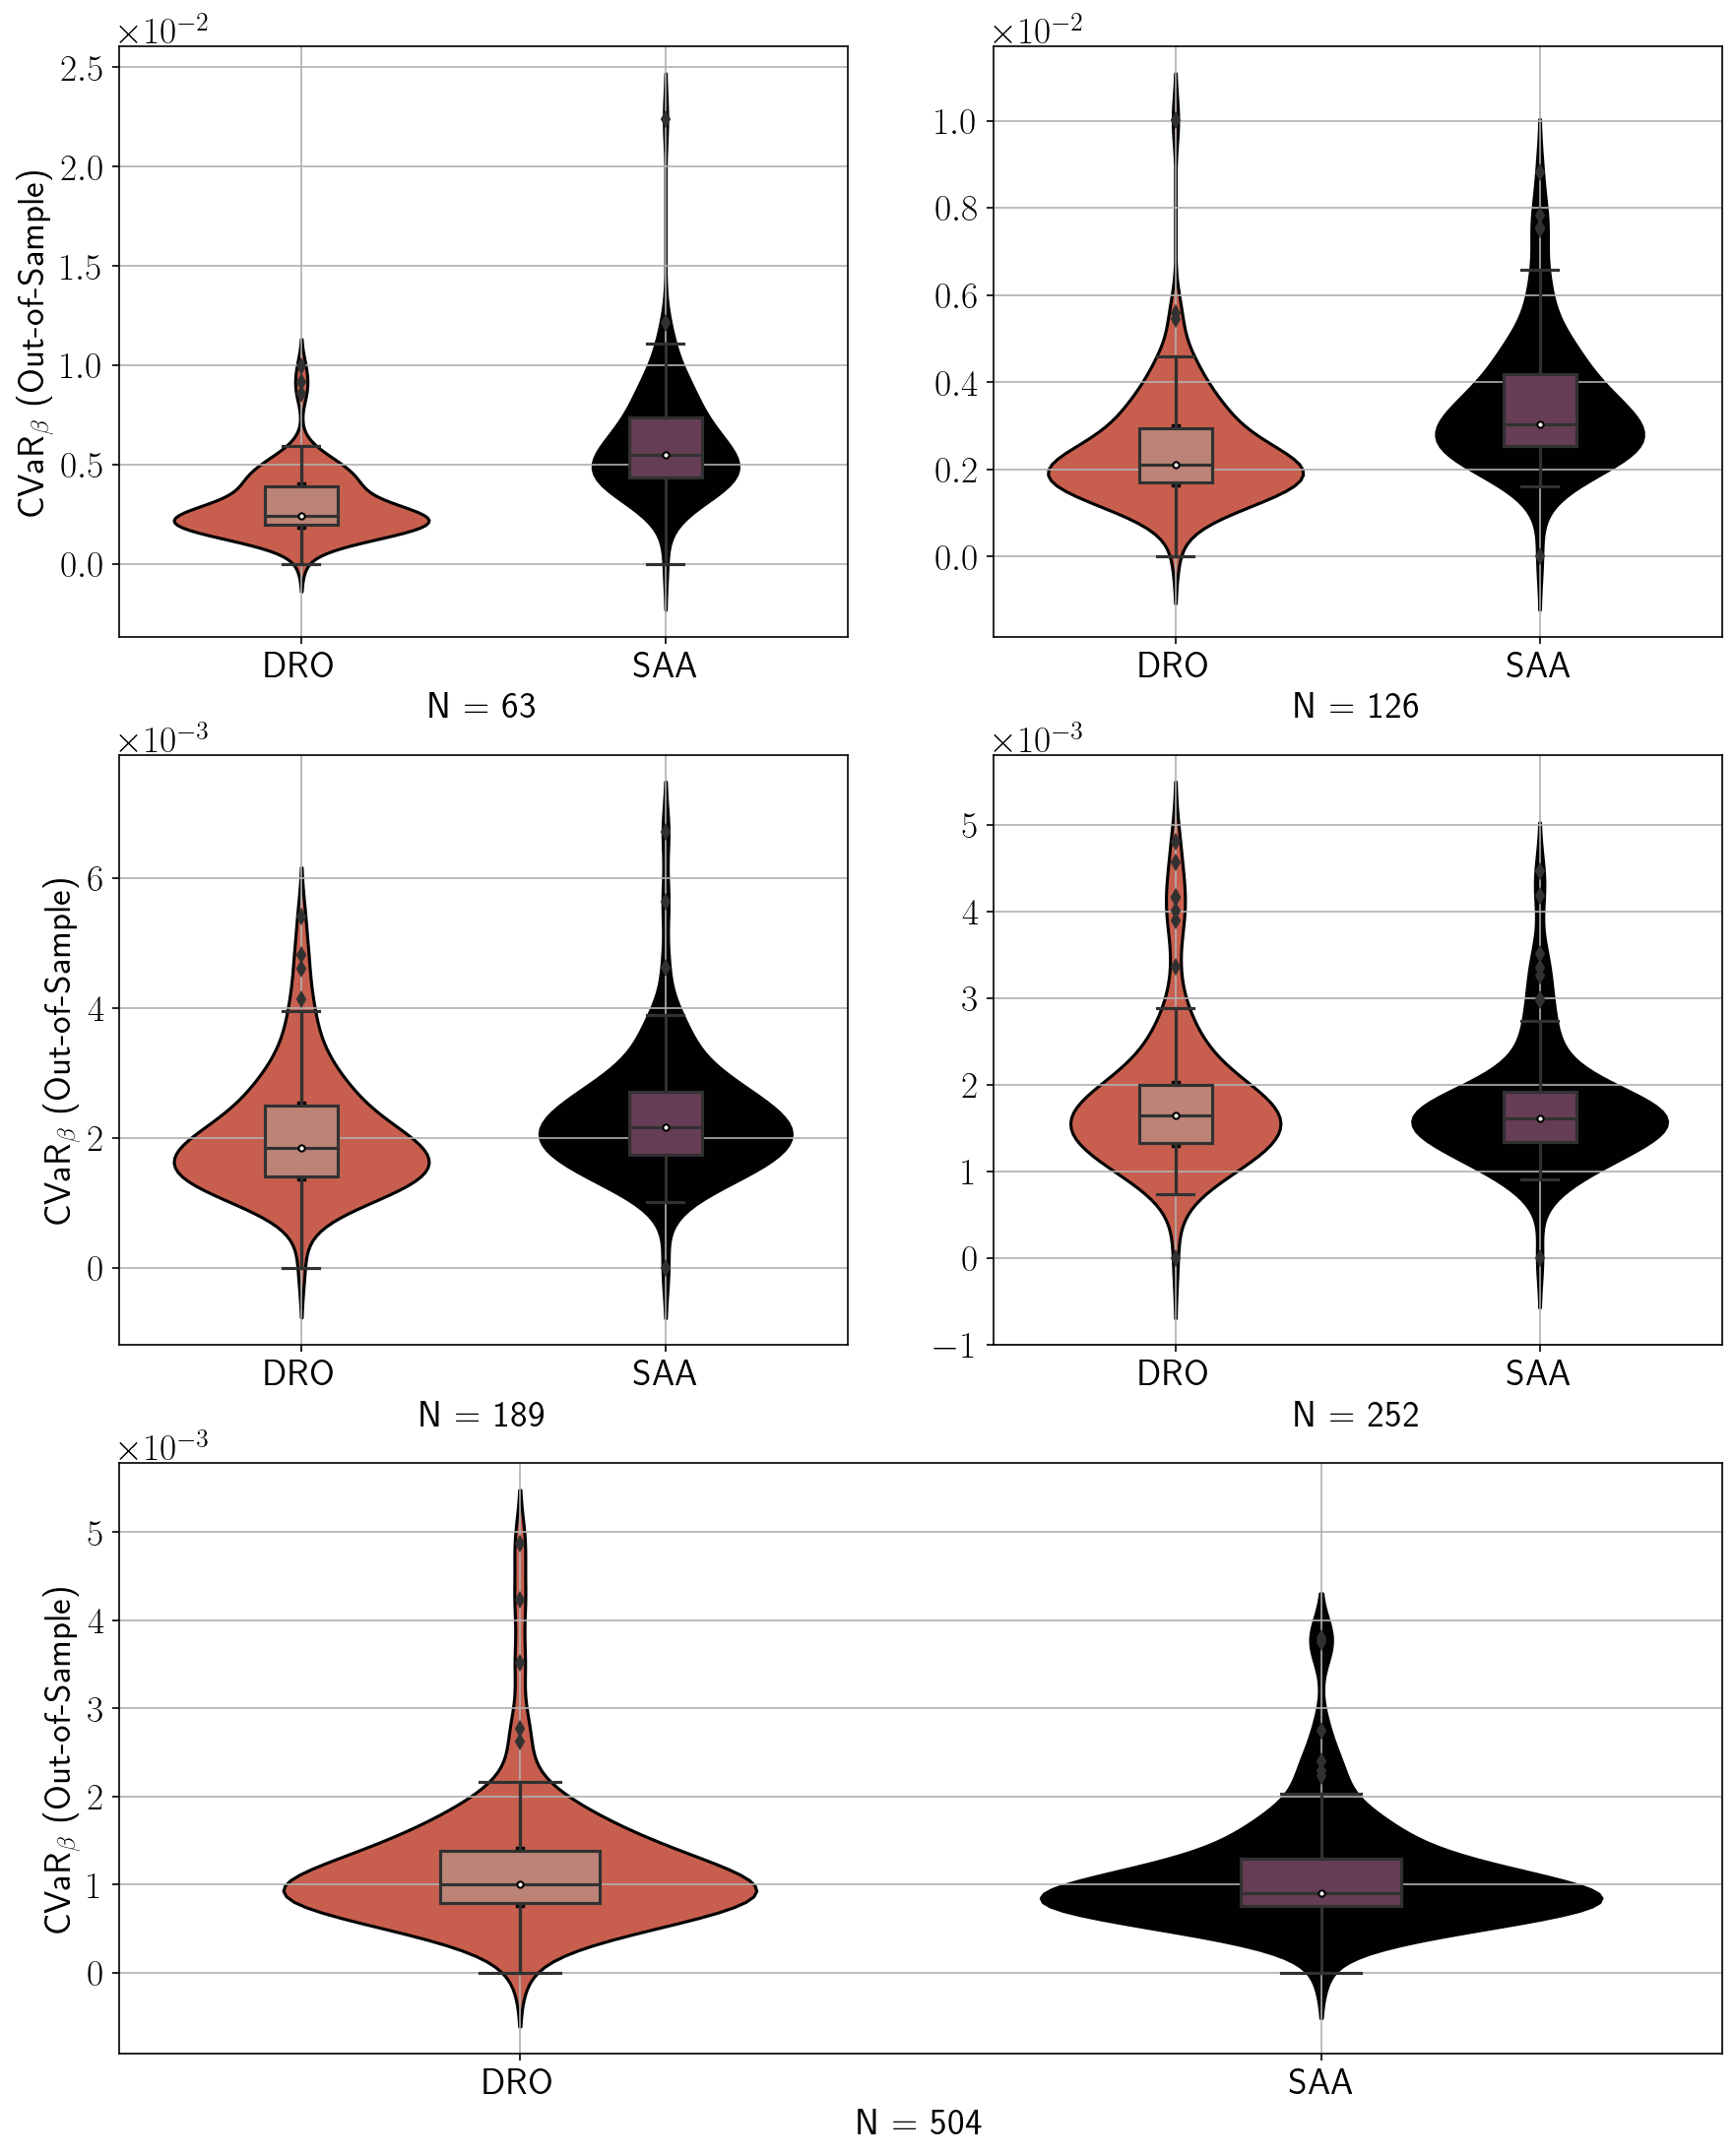

In [27]:
# Instantiate plot
def_font_size = 18
fig = plt.figure(figsize=(14, 18), dpi=150)
gs = gridspec.GridSpec(3, 2, height_ratios=[1,1,1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})
plt.rcParams['xtick.labelsize'] = def_font_size;
plt.rcParams['ytick.labelsize'] = def_font_size;

# Create two subplots (axes)
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot
ax3 = fig.add_subplot(gs[1, 0])  # Third subplot
ax4 = fig.add_subplot(gs[1, 1])  # Fourth subplot
ax5 = fig.add_subplot(gs[2, :])  # Fifth subplot

TX = 0

# Sample data
statisticsIndex = 5
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax1, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax1, saturation=0.40)

# Add labels and legend to the first subplot
ax1.set_xlabel(f'N = {trainingSizes[TX]}')
ax1.set_ylabel(r'CVaR$_{\beta}$ (Out-of-Sample)')
ax1.grid(True)
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Repeat for the next
TX = 1

# Sample data
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax2, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax2, saturation=0.40)

# Add labels and legend to the first subplot
ax2.set_xlabel(f'N = {trainingSizes[TX]}')
ax2.set_ylabel('')
ax2.grid(True)
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Repeat for the next
TX = 2

# Sample data
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax3, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax3, saturation=0.40)

# Add labels and legend to the first subplot
ax3.set_xlabel(f'N = {trainingSizes[TX]}')
ax3.set_ylabel(r'CVaR$_{\beta}$ (Out-of-Sample)')
ax3.grid(True)
ax3.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Repeat for the next
TX = 3

# Sample data
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax4, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax4, saturation=0.40)

# Add labels and legend to the first subplot
ax4.set_xlabel(f'N = {trainingSizes[TX]}')
ax4.set_ylabel('')
ax4.grid(True)
ax4.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Repeat for the next
TX = 4

# Sample data
IS_SAA_stats = IS_statistics[0, TX, :, statisticsIndex]
OoS_SAA_stats = OoS_statistics[0, TX, :, statisticsIndex]
IS_DRO_stats = IS_statistics[1, TX, :, statisticsIndex]
OoS_DRO_stats = OoS_statistics[1, TX, :, statisticsIndex]

# Combine the data into a DataFrame
df = pd.DataFrame({
    'Models': ['DRO'] * len(OoS_DRO_stats) + ['SAA'] * len(OoS_SAA_stats),
    'Sortino Ratios': np.concatenate([OoS_DRO_stats, OoS_SAA_stats])
})

# Create a violin plot on the first subplot
sns.violinplot(x='Models', y='Sortino Ratios', data=df, ax=ax5, palette=[myMap(0.6), myMap(0.0)], width=0.7, inner='box')
sns.boxplot(x='Models', y='Sortino Ratios', data=df, palette='rocket_r', width=0.2,
            boxprops={'zorder': 2}, ax=ax5, saturation=0.40)

# Add labels and legend to the first subplot
ax5.set_xlabel(f'N = {trainingSizes[TX]}')
ax5.set_ylabel(r'CVaR$_{\beta}$ (Out-of-Sample)')
ax5.grid(True)
ax5.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Save figure
relativePathPlots = "./ResultsPlots/Backtest/RAERM/"
fileName = 'Backtest_RAERMDRO_Fig14_CVaR_ALL.pdf'
relativeFilePath = relativePathPlots + fileName
plt.savefig(relativeFilePath, dpi=150)

# Show the plot
plt.show()

For the sake of being thorough, it should include an overview plot.

### Statistics for Tables (Out-of-Sample)

The following show the code related to the statistics engine. The number corresponds to the index.

0. Objective
1.  DownsideSemiStandardDeviation
2. RMSE
3. MAD
4. VaR
5. CVaR
6. ExcessReturnAverage
7. ExcessReturn
8. SortinoIndex
9. BeatBenchmarkRatio
10. BeatBenchmarkExcess
11. BeatBenchmarkShortfall
12. BeatBenchmarkRewardRiskRatio
13. BeatBenchmarkShortfallRewardRiskRatio
14. MarketBeta
15. TotalReturn
16. AverageReturn
17. P5
18. P10
19. P90
20. P95

In [28]:
SAAResult = np.mean(OoS_statistics[0,:,:,:], axis=1)
N = [63, 63*2, 63*3, 63*4, 63*8]

for i in range(SAAResult.shape[0]):
    TER = round(((1 + SAAResult[i, 7]/100)**4-1)*100, 2)
    AER = round(SAAResult[i, 6], 4)
    RMSE = round(SAAResult[i, 2], 4)
    VaR_80 = round(-SAAResult[i, 4], 4)
    CVaR_80 = round(SAAResult[i, 5], 4)
    Beta = round(SAAResult[i, 14], 2)
    Sortino = round(SAAResult[i, 8], 2)
    BBR = round(SAAResult[i, 9]*100, 2)
    
    print(f"{N[i]} & {TER} & {AER} & {VaR_80} & {CVaR_80} & {Sortino} & {BBR} \\\\")  # Add table row

63 & 7.13 & 0.0003 & 0.0032 & 0.0061 & 0.11 & 52.8 \\
126 & 5.89 & 0.0002 & 0.0018 & 0.0035 & 0.16 & 54.75 \\
189 & 4.45 & 0.0002 & 0.0012 & 0.0023 & 0.19 & 54.6 \\
252 & 4.04 & 0.0002 & 0.0009 & 0.0017 & 0.21 & 55.15 \\
504 & 3.57 & 0.0001 & 0.0006 & 0.0011 & 0.3 & 55.72 \\


In [29]:
DROResult = np.mean(OoS_statistics[1,:,:,:], axis=1)
N = [63, 63*2, 63*3, 63*4, 63*8]

for i in range(DROResult.shape[0]):
    TER = round(((1 + DROResult[i, 7]/100)**4-1)*100, 2)
    AER = round(DROResult[i, 6], 4)
    RMSE = round(DROResult[i, 2], 4)
    VaR_80 = round(-DROResult[i, 4], 4)
    CVaR_80 = round(DROResult[i, 5], 4)
    Sortino = round(DROResult[i, 8], 2)
    BBR = round(DROResult[i, 9]*100, 2)
    
    print(f"{N[i]} & {TER} & {AER} & {VaR_80} & {CVaR_80} & {Sortino} & {BBR} \\\\")  # Add table row

63 & 7.13 & 0.0003 & 0.0016 & 0.003 & 0.21 & 55.29 \\
126 & 5.84 & 0.0002 & 0.0013 & 0.0025 & 0.22 & 55.42 \\
189 & 4.81 & 0.0002 & 0.001 & 0.0021 & 0.23 & 55.27 \\
252 & 4.33 & 0.0002 & 0.0009 & 0.0018 & 0.21 & 54.6 \\
504 & 3.7 & 0.0001 & 0.0006 & 0.0012 & 0.27 & 55.71 \\


### Statistics for Tables (In-Sample)

In [30]:
SAAResult = np.mean(IS_statistics[0,:,:,:], axis=1)
N = [63, 63*2, 63*3, 63*4, 63*8]

for i in range(SAAResult.shape[0]):
    TER = round(((1 + SAAResult[i, 7]/100)**4-1)*100, 2)
    AER = round(SAAResult[i, 6], 4)
    RMSE = round(SAAResult[i, 2], 4)
    VaR_80 = round(-SAAResult[i, 4], 4)
    CVaR_80 = round(SAAResult[i, 5], 4)
    Beta = round(SAAResult[i, 14], 2)
    Sortino = round(SAAResult[i, 8], 2)
    BBR = round(SAAResult[i, 9]*100, 2)
    
    print(f"{N[i]} & {TER} & {AER} & {VaR_80} & {CVaR_80} & {Sortino} & {BBR} \\\\")  # Add table row

63 & 150.48 & 0.0036 & -0.0015 & -0.0007 & 94.1 & 95.68 \\
126 & 142.01 & 0.0017 & -0.0004 & 0.0002 & 19.98 & 90.83 \\
189 & 137.93 & 0.0011 & -0.0001 & 0.0005 & 4.77 & 85.51 \\
252 & 139.84 & 0.0008 & 0.0001 & 0.0007 & 2.66 & 79.96 \\
504 & 214.81 & 0.0005 & 0.0004 & 0.0013 & 0.91 & 68.65 \\


In [31]:
DROResult = np.mean(IS_statistics[1,:,:,:], axis=1)
N = [63, 63*2, 63*3, 63*4, 63*8]

for i in range(DROResult.shape[0]):
    TER = round(((1 + DROResult[i, 7]/100)**4-1)*100, 2)
    AER = round(DROResult[i, 6], 4)
    RMSE = round(DROResult[i, 2], 4)
    VaR_80 = round(-DROResult[i, 4], 4)
    CVaR_80 = round(DROResult[i, 5], 4)
    Sortino = round(DROResult[i, 8], 2)
    BBR = round(DROResult[i, 9]*100, 2)
    
    print(f"{N[i]} & {TER} & {AER} & {VaR_80} & {CVaR_80} & {Sortino} & {BBR} \\\\")  # Add table row

63 & 40.66 & 0.0013 & -0.0001 & 0.0005 & 13.77 & 78.51 \\
126 & 59.17 & 0.0009 & 0.0002 & 0.0009 & 13.03 & 74.9 \\
189 & 79.86 & 0.0007 & 0.0003 & 0.001 & 2.18 & 72.99 \\
252 & 100.47 & 0.0006 & 0.0003 & 0.0011 & 1.61 & 70.66 \\
504 & 214.08 & 0.0005 & 0.0005 & 0.0014 & 0.85 & 67.25 \\


## Plot of Efficient Frontier

We start by loading the new data.

In [32]:
# Set relative path
relativePath = "./Results/Backtest/RAERM/"

# Set idRecording (different from the one above)
idRecording = 2

# Sepcify numbers of rho's
trainingSizes = [oneQuarter, 4*oneQuarter]
totalRhos = 30
nTrainings = len(trainingSizes)

# Load optimal Wasserstein radii
fileNameEps = "id{}_Frontier_Backtest_RAERM_epsOpt_Experiment1.csv".format(idRecording)
filePathEps = relativePath + fileNameEps
epsOpt = np.loadtxt(filePathEps).reshape((totalRhos, nTrainings, nRebalances))

# Load trajectories of portfolios
fileNameTrajectories = "id{}_Frontier_Backtest_RAERM_Trajectories_Experiment1.csv".format(idRecording)
filePathTrajectories = relativePath + fileNameTrajectories
trajectories = np.loadtxt(filePathTrajectories).reshape((totalRhos, nTrainings, len(trajectoryDates), nTrajectories))

# Load in-sample statistics
fileNameInSample = "id{}_Frontier_Backtest_RAERM_IS_statistics_Experiment1.csv".format(idRecording)
filePathInSample = relativePath + fileNameInSample
IS_statistics = np.loadtxt(filePathInSample).reshape((nModels, totalRhos, nTrainings, nRebalances, nStatistics))

# Load out-of-sample statistics
fileNameOutOfSample = "id{}_Frontier_Backtest_RAERM_OoS_statistics_Experiment1.csv".format(idRecording)
filePathOutOfSample = relativePath + fileNameOutOfSample
OoS_statistics = np.loadtxt(filePathOutOfSample).reshape((nModels, totalRhos, nTrainings, nRebalances, nStatistics))

Then we can plot the efficient frontier.

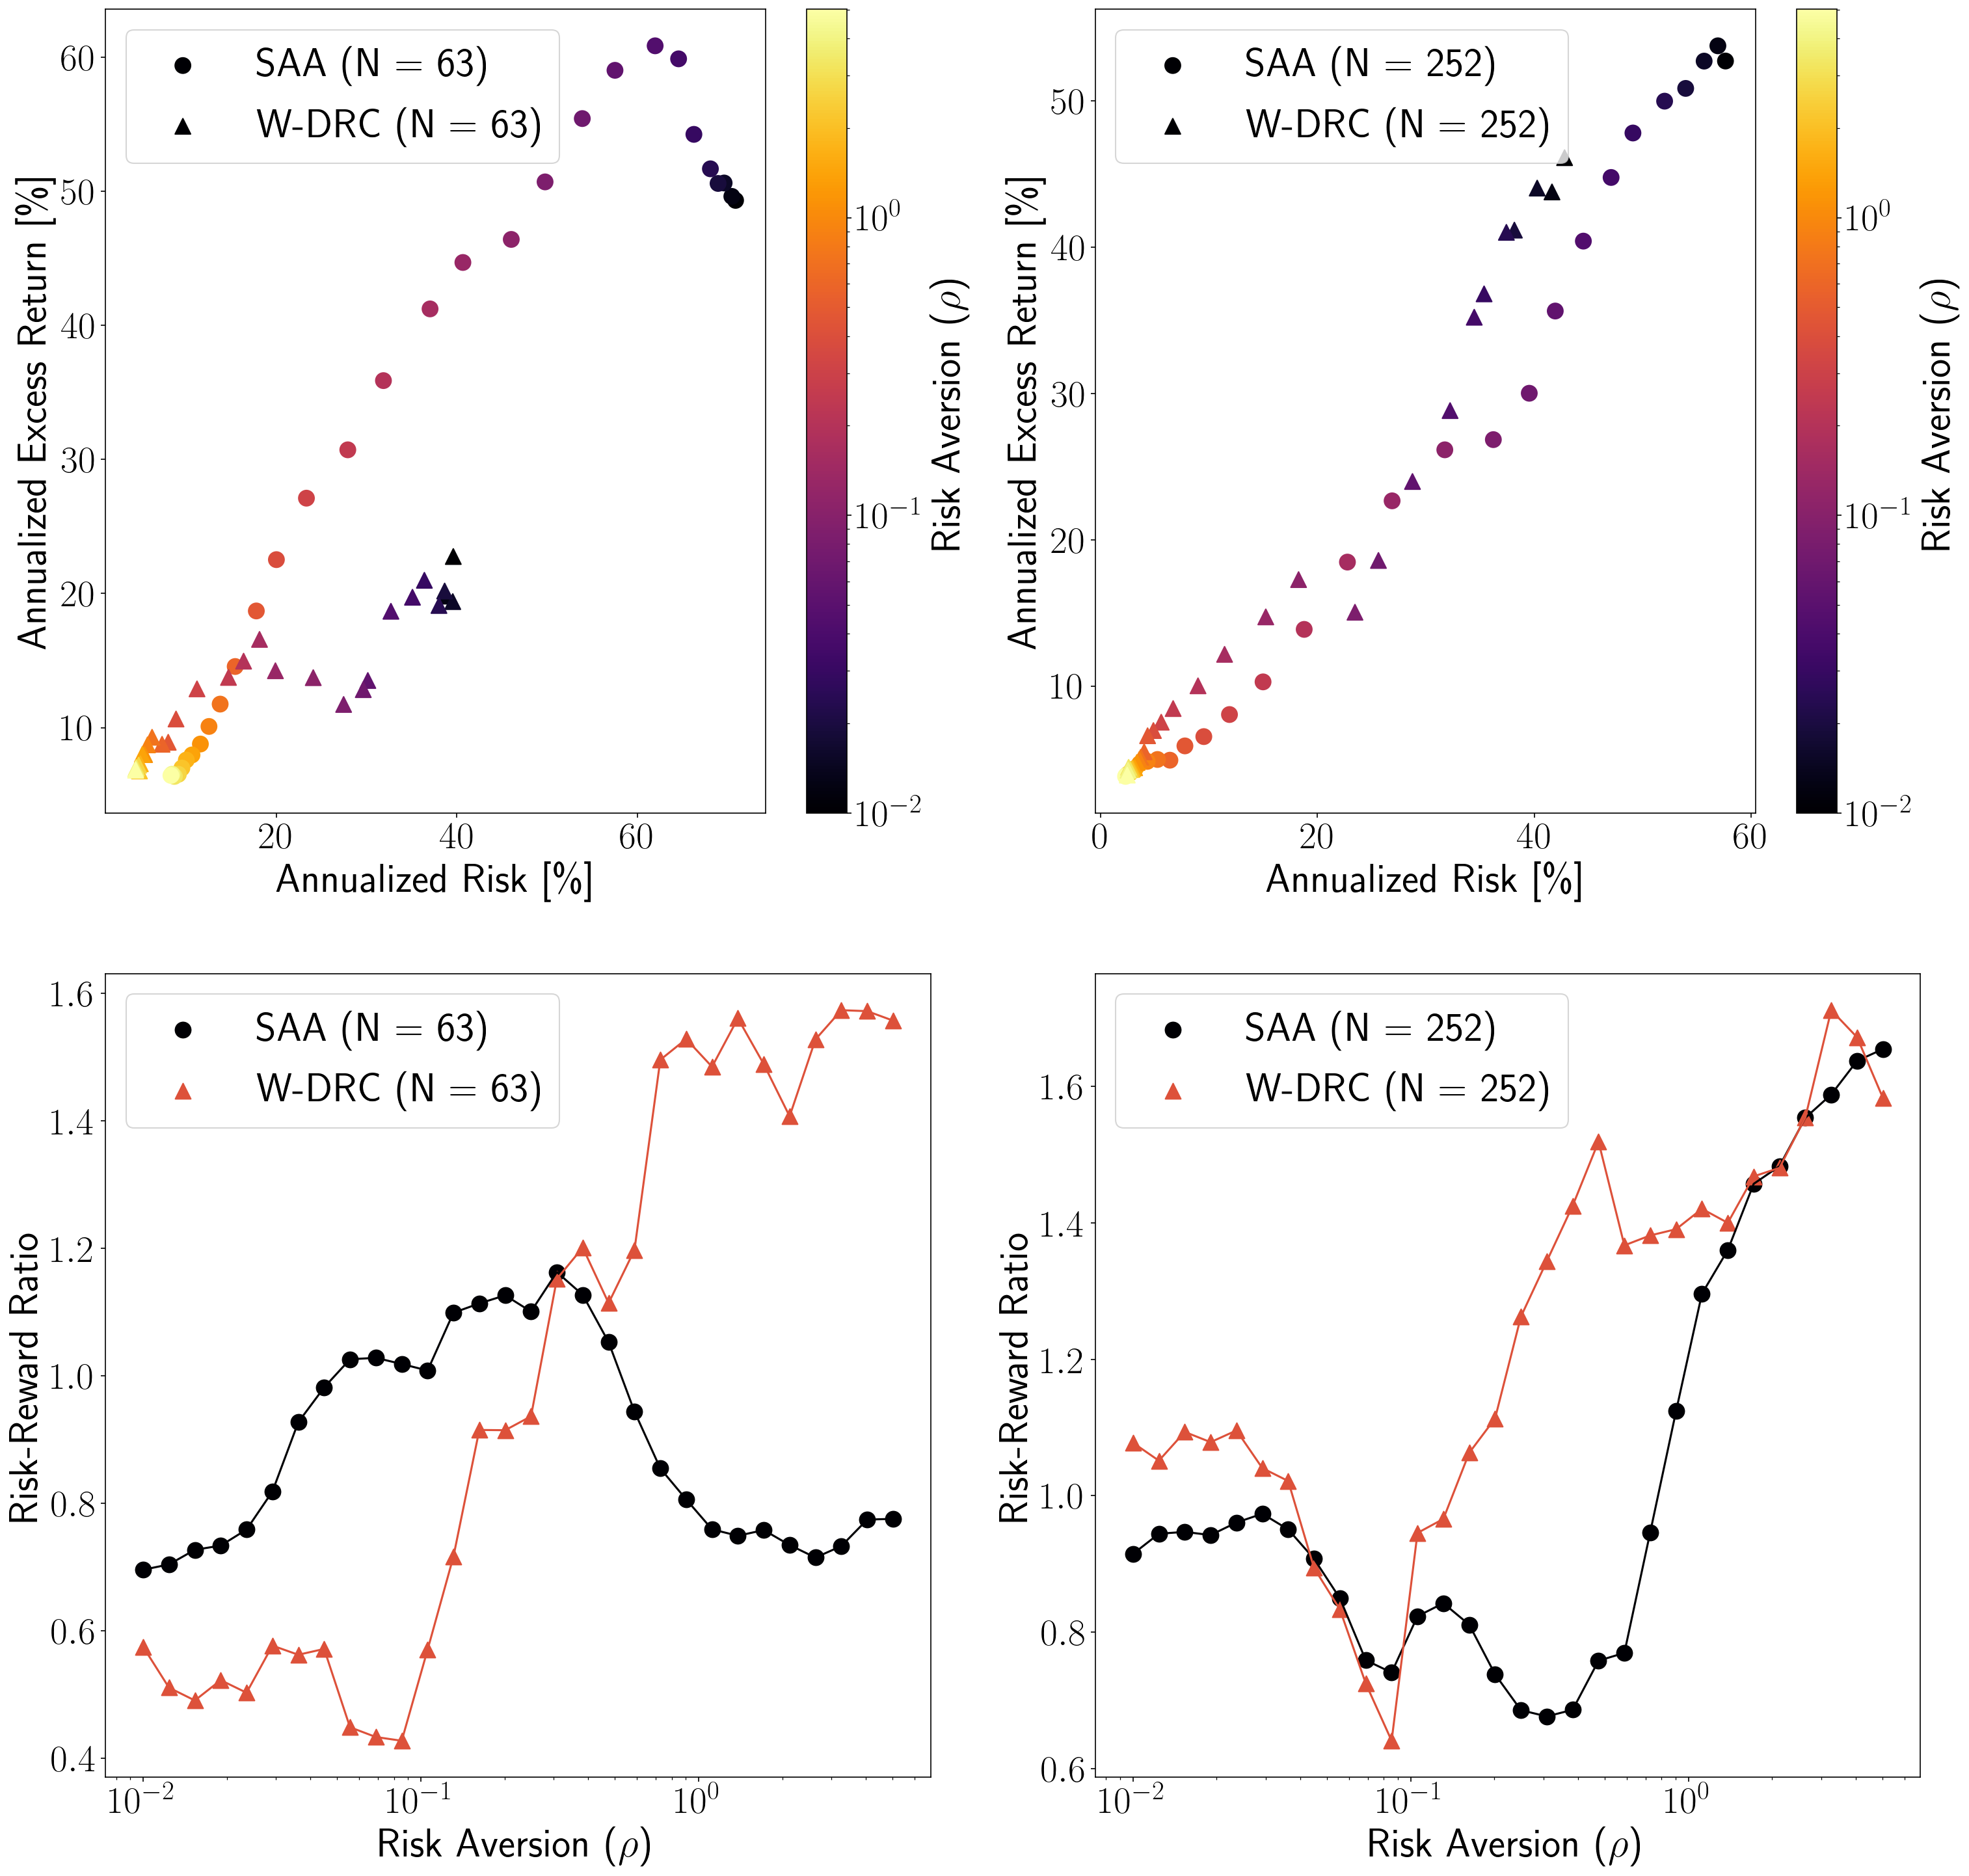

In [33]:
# Import
from matplotlib.colors import LogNorm

# Layout configurations
def_font_size = 28
plt.rcParams['xtick.labelsize'] = def_font_size;
plt.rcParams['ytick.labelsize'] = def_font_size;
fig = plt.figure(figsize=(24, 24), dpi=150)
gs = gridspec.GridSpec(2, 2, height_ratios=[1,1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})

# Create two subplots (axes)
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[1, 0])  # Second subplot
ax3 = fig.add_subplot(gs[0, 1])  # Third subplot
ax4 = fig.add_subplot(gs[1, 1])  # Fourth subplot

# Reformat data
riskData = np.mean(OoS_statistics[:,:,:,:,5], axis=3)*np.sqrt(252)*100
returnData = ((1 + np.mean(OoS_statistics[:,:,:,:,6], axis=3))**252 - 1)*100
startRho = -2
endRho = 0.7
totalRho = 30
rhos = 10**np.linspace(startRho, endRho, totalRho)

# Omit
OMIT = 0
dotSize = 130

# Plotting data with colors based on rhos
TX = 0
sc = ax1.scatter(riskData[0, OMIT:, TX], returnData[0, OMIT:, TX], c=rhos[OMIT:], cmap='inferno', marker="o", s=dotSize, label=f"SAA (N = {trainingSizes[TX]})", norm=LogNorm())
sc = ax1.scatter(riskData[1, OMIT:, TX], returnData[1, OMIT:, TX], c=rhos[OMIT:], cmap='inferno', marker="^", s=dotSize, label=f"W-DRC (N = {trainingSizes[TX]})", norm=LogNorm())
ax1.set_xlabel(r"Annualized Risk [\%]", fontsize=def_font_size + 2)
ax1.set_ylabel(r"Annualized Excess Return [\%]", fontsize=def_font_size + 2)
ax1.legend(fontsize=def_font_size + 2, loc="upper left")

# Adding colorbar based on rhos
cbar = plt.colorbar(sc, ax=ax1)
cbar.ax.set_ylabel(r'Risk Aversion ($\rho$)', fontsize=def_font_size + 2)

# Plotting data with colors based on rhos
riskRewardSAA = returnData[0, OMIT:, TX]/riskData[0, OMIT:, TX]
riskRewardDRO = returnData[1, OMIT:, TX]/riskData[1, OMIT:, TX]
ax2.scatter(rhos[OMIT:], riskRewardSAA, color=myMap(0.0), marker="o", s=dotSize, label=f"SAA (N = {trainingSizes[TX]})")
ax2.scatter(rhos[OMIT:], riskRewardDRO, color=myMap(0.6), marker="^", s=dotSize, label=f"W-DRC (N = {trainingSizes[TX]})")
ax2.plot(rhos[OMIT:], riskRewardSAA, color=myMap(0.0))
ax2.plot(rhos[OMIT:], riskRewardDRO, color=myMap(0.6))
ax2.set_xlabel(r"Risk Aversion ($\rho$)", fontsize=def_font_size + 2)
ax2.set_ylabel(r"Risk-Reward Ratio", fontsize=def_font_size + 2)
ax2.set_xscale('log')
ax2.legend(fontsize=def_font_size + 2, loc="upper left")

# Plotting data with colors based on rhos
TX = 1
sc = ax3.scatter(riskData[0, OMIT:, TX], returnData[0, OMIT:, TX], c=rhos[OMIT:], cmap='inferno', marker="o", s=dotSize, label=f"SAA (N = {trainingSizes[TX]})", norm=LogNorm())
sc = ax3.scatter(riskData[1, OMIT:, TX], returnData[1, OMIT:, TX], c=rhos[OMIT:], cmap='inferno', marker="^", s=dotSize, label=f"W-DRC (N = {trainingSizes[TX]})", norm=LogNorm())
ax3.set_xlabel(r"Annualized Risk [\%]", fontsize=def_font_size + 2)
ax3.set_ylabel(r"Annualized Excess Return [\%]", fontsize=def_font_size + 2)
ax3.legend(fontsize=def_font_size + 2, loc="upper left")

# Adding colorbar based on rhos
cbar = plt.colorbar(sc, ax=ax3)
cbar.ax.set_ylabel(r'Risk Aversion ($\rho$)', fontsize=def_font_size + 2)

# Plotting data with colors based on rhos
TX = 1
riskRewardSAA = returnData[0, OMIT:, TX]/riskData[0, OMIT:, TX]
riskRewardDRO = returnData[1, OMIT:, TX]/riskData[1, OMIT:, TX]
ax4.scatter(rhos[OMIT:], riskRewardSAA, color=myMap(0.0), marker="o", s=dotSize, label=f"SAA (N = {trainingSizes[TX]})")
ax4.scatter(rhos[OMIT:], riskRewardDRO, color=myMap(0.6), marker="^", s=dotSize, label=f"W-DRC (N = {trainingSizes[TX]})")
ax4.plot(rhos[OMIT:], riskRewardSAA, color=myMap(0.0))
ax4.plot(rhos[OMIT:], riskRewardDRO, color=myMap(0.6))
ax4.set_xlabel(r"Risk Aversion ($\rho$)", fontsize=def_font_size + 2)
ax4.set_ylabel(r"Risk-Reward Ratio", fontsize=def_font_size + 2)
ax4.set_xscale('log')
ax4.legend(fontsize=def_font_size + 2, loc="upper left")

# Save and show plot
plt.savefig('./ResultsPlots/Backtest/RAERM/Backtest_RAERMDRO_Fig15_EfficientFrontier.pdf', dpi=150);
plt.show()

It also makes sense to look at the risk and excess returns separately for respectively $N = 63$ and $N = 252$.

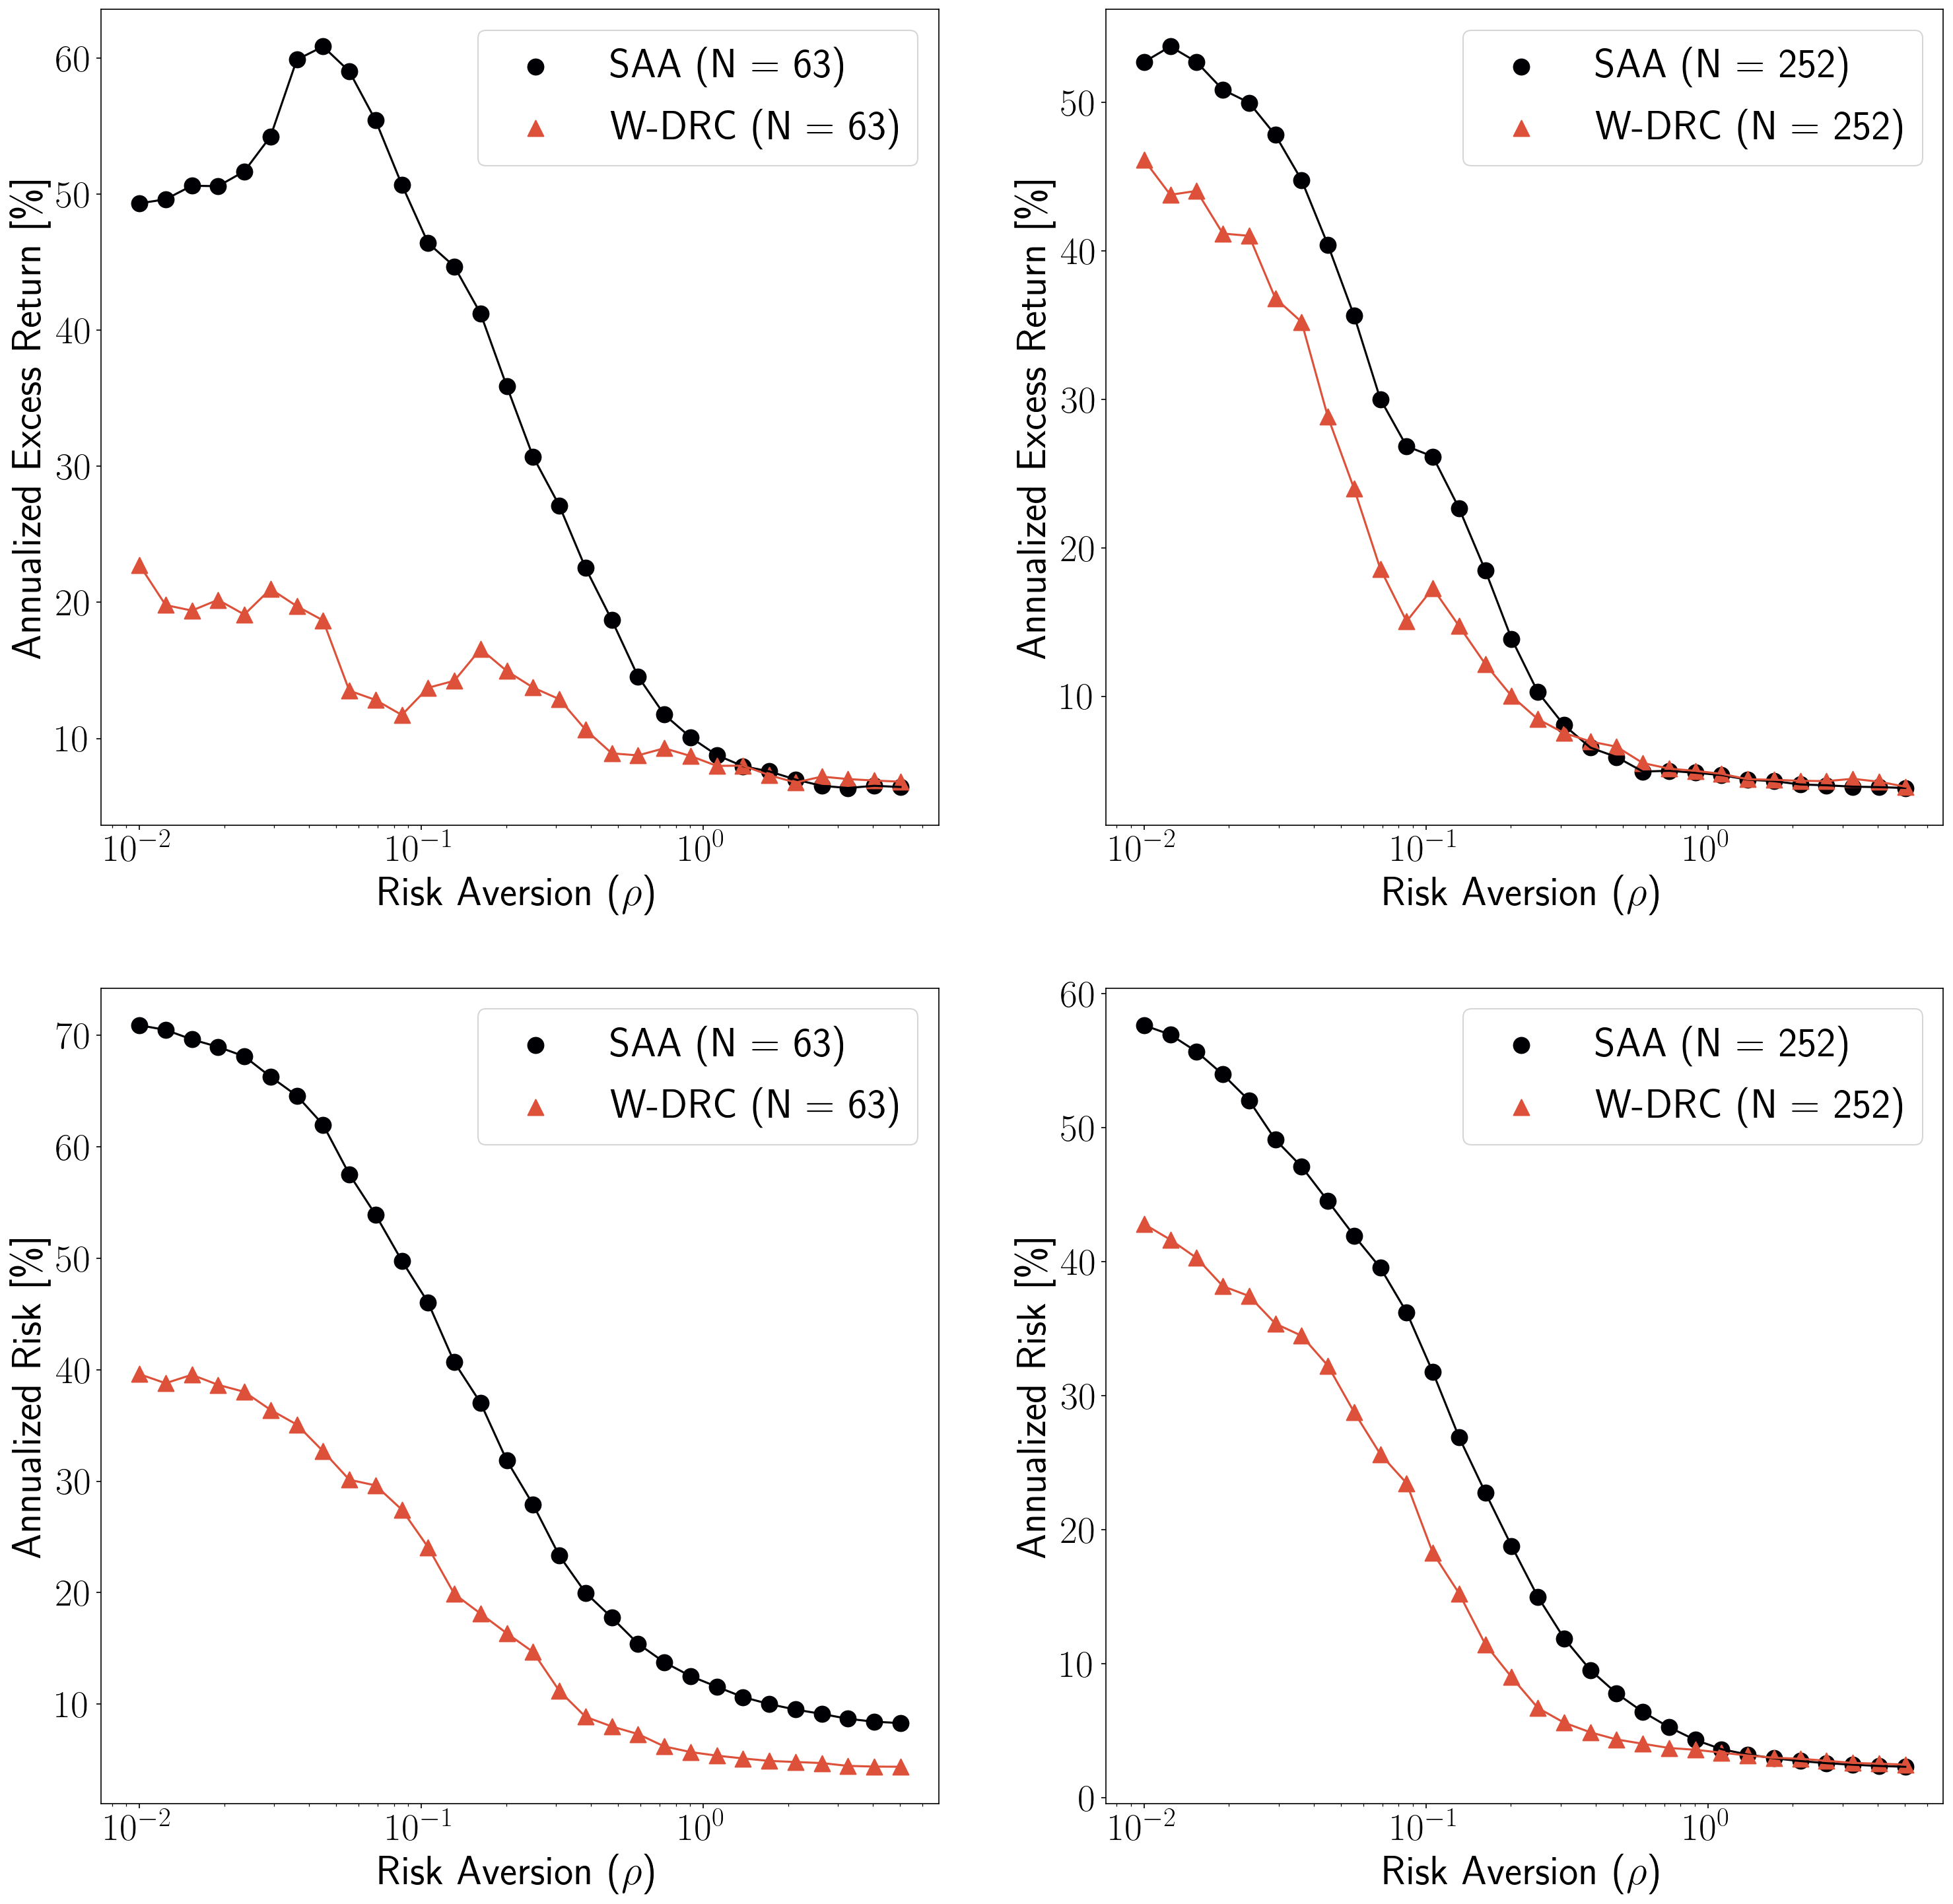

In [34]:
# Import
from matplotlib.colors import LogNorm

# Layout configurations
def_font_size = 28
plt.rcParams['xtick.labelsize'] = def_font_size;
plt.rcParams['ytick.labelsize'] = def_font_size;
fig = plt.figure(figsize=(24, 24), dpi=150)
gs = gridspec.GridSpec(2, 2, height_ratios=[1,1], width_ratios=[1,1])
plt.rcParams.update({'font.size': def_font_size})

# Create two subplots (axes)
ax1 = fig.add_subplot(gs[0, 0])  # First subplot
ax2 = fig.add_subplot(gs[1, 0])  # Second subplot
ax3 = fig.add_subplot(gs[0, 1])  # Third subplot
ax4 = fig.add_subplot(gs[1, 1])  # Fourth subplot

# Reformat data
riskData = np.mean(OoS_statistics[:,:,:,:,5], axis=3)*np.sqrt(252)*100
returnData = ((1 + np.mean(OoS_statistics[:,:,:,:,6], axis=3))**252 - 1)*100
startRho = -2
endRho = 0.7
totalRho = 30
rhos = 10**np.linspace(startRho, endRho, totalRho)

# Omit
OMIT = 0
dotSize = 130

# Plotting data with colors based on rhos
TX = 0
sc = ax1.scatter(rhos[OMIT:], returnData[0, OMIT:, TX], marker="o", s=dotSize, color=myMap(0.0), label=f"SAA (N = {trainingSizes[TX]})")
sc = ax1.scatter(rhos[OMIT:], returnData[1, OMIT:, TX], marker="^", s=dotSize, color=myMap(0.6), label=f"W-DRC (N = {trainingSizes[TX]})")
ax1.plot(rhos[OMIT:], returnData[0, OMIT:, TX], color=myMap(0.0))
ax1.plot(rhos[OMIT:], returnData[1, OMIT:, TX], color=myMap(0.6))
ax1.set_xlabel(r"Risk Aversion ($\rho$)", fontsize=def_font_size + 2)
ax1.set_ylabel(r"Annualized Excess Return [\%]", fontsize=def_font_size + 2)
ax1.set_xscale('log')
ax1.legend(fontsize=def_font_size + 2, loc="upper right")

# Plotting data with colors based on rhos
ax2.scatter(rhos[OMIT:], riskData[0, OMIT:, TX], color=myMap(0.0), marker="o", s=dotSize, label=f"SAA (N = {trainingSizes[TX]})")
ax2.scatter(rhos[OMIT:], riskData[1, OMIT:, TX], color=myMap(0.6), marker="^", s=dotSize, label=f"W-DRC (N = {trainingSizes[TX]})")
ax2.plot(rhos[OMIT:], riskData[0, OMIT:, TX], color=myMap(0.0))
ax2.plot(rhos[OMIT:], riskData[1, OMIT:, TX], color=myMap(0.6))
ax2.set_xlabel(r"Risk Aversion ($\rho$)", fontsize=def_font_size + 2)
ax2.set_ylabel(r"Annualized Risk [\%]", fontsize=def_font_size + 2)
ax2.set_xscale('log')
ax2.legend(fontsize=def_font_size + 2, loc="upper right")

# Plotting data with colors based on rhos
TX = 1
sc = ax3.scatter(rhos[OMIT:], returnData[0, OMIT:, TX], marker="o", s=dotSize, color=myMap(0.0), label=f"SAA (N = {trainingSizes[TX]})")
sc = ax3.scatter(rhos[OMIT:], returnData[1, OMIT:, TX], marker="^", s=dotSize, color=myMap(0.6), label=f"W-DRC (N = {trainingSizes[TX]})")
ax3.plot(rhos[OMIT:], returnData[0, OMIT:, TX], color=myMap(0.0))
ax3.plot(rhos[OMIT:], returnData[1, OMIT:, TX], color=myMap(0.6))
ax3.set_xlabel(r"Risk Aversion ($\rho$)", fontsize=def_font_size + 2)
ax3.set_ylabel(r"Annualized Excess Return [\%]", fontsize=def_font_size + 2)
ax3.set_xscale('log')
ax3.legend(fontsize=def_font_size + 2, loc="upper right")

# Plotting data with colors based on rhos
ax4.scatter(rhos[OMIT:], riskData[0, OMIT:, TX], color=myMap(0.0), marker="o", s=dotSize, label=f"SAA (N = {trainingSizes[TX]})")
ax4.scatter(rhos[OMIT:], riskData[1, OMIT:, TX], color=myMap(0.6), marker="^", s=dotSize, label=f"W-DRC (N = {trainingSizes[TX]})")
ax4.plot(rhos[OMIT:], riskData[0, OMIT:, TX], color=myMap(0.0))
ax4.plot(rhos[OMIT:], riskData[1, OMIT:, TX], color=myMap(0.6))
ax4.set_xlabel(r"Risk Aversion ($\rho$)", fontsize=def_font_size + 2)
ax4.set_ylabel(r"Annualized Risk [\%]", fontsize=def_font_size + 2)
ax4.set_xscale('log')
ax4.legend(fontsize=def_font_size + 2, loc="upper right")

# Save and show plot
plt.savefig('./ResultsPlots/Backtest/RAERM/Backtest_RAERMDRO_Fig16_EfficientFrontier.pdf', dpi=150);
plt.show()